# Install Dependancies

Importing all the necessary libraries.

In [1]:
pip install ruptures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 998 kB 5.2 MB/s 


In [2]:
import pandas as pd
import numpy as np
from io import StringIO
import math
import ast
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import statistics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import ruptures as rpt

# Data Loading and Data Processing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Famous Players
nba_1 = pd.read_csv("/content/drive/Shareddrives/Data Science/OPUS/lab_1/src/nba_kingjames.csv", index_col=[0])
nba_1 = nba_1.append(pd.read_csv("/content/drive/Shareddrives/Data Science/OPUS/lab_1/src/nba_damianlillard.csv", index_col=[0]), ignore_index = True)
nba_1 = nba_1.append(pd.read_csv("/content/drive/Shareddrives/Data Science/OPUS/lab_1/src/nba_giannis_an34_ygtrece.csv", index_col=[0]), ignore_index = True)
nba_1 = nba_1.append(pd.read_csv("/content/drive/Shareddrives/Data Science/OPUS/lab_1/src/nba_kyrieirving_EasyMoneySniper_jharden13_cp3_zo.csv", index_col=[0]), ignore_index = True)
nba_1 = nba_1.append(pd.read_csv("/content/drive/Shareddrives/Data Science/OPUS/lab_1/src/nba_stephencurry30_russwest44.csv", index_col=[0]), ignore_index = True)
nba_1 = nba_1.append(pd.read_csv("/content/drive/Shareddrives/Data Science/OPUS/lab_1/src/nba_new_players_jordan_poole_jokicnikolaofficial_melo.csv", index_col=[0]), ignore_index = True)
nba_1 = nba_1.append(pd.read_csv("/content/drive/Shareddrives/Data Science/OPUS/lab_1/src/nba_new_players_jamorant_anthony.csv", index_col=[0]), ignore_index = True)
nba_1['posts'] = [ast.literal_eval(x) for x in nba_1['posts']]
nba_final_df = nba_1
nba_final_df

title         insta_handle  no_posts  followers  \
0                       👑            kingjames      2302  118000000   
1          Damian Lillard        damianlillard      4394   94000000   
2   Giannis Antetokounmpo         giannis_an34       807  124000000   
3             Paul George              ygtrece      1487   93000000   
4              K.A.I Hélà          kyrieirving       315  163000000   
5                     NaN      EasyMoneySniper        30  128000000   
6            James Harden            jharden13        53  117000000   
7              Chris Paul                  cp3      1504  111000000   
8              Lonzo Ball                   zo       293  133000000   
9           Wardell Curry       stephencurry30      1027  415000000   
10      Russell Westbrook           russwest44      1353  194000000   
11         Jordan Poole 🥷         jordan_poole        18     720000   
12       Nikola Jokic | 🃏  jokicnikolaofficial       326     589000   
13            LaMelo Ball                 melo       364   86000000   
14                 12 🥷🏽🖤             jamorant       233   67000000   
15        Anthony Edwards   theanthonyedwards_        20    1000000   

    following                                                bio  \
0         377                                                  👑   
1        2489  Damian Lillard\nDame D.O.L.L.A.\n#YKWTII ⌚\nli...   
2          96  Giannis Antetokounmpo\nSportsperson\nl AM MY F...   
3         728                                Paul George\n1️⃣3️⃣   
4         698  K.A.I Hélà\nArtist\nA11Even\nTwitch.tv/Kai11xi...   
5        2521                                                NaN   
6         491  James Harden\n@jharden13\nwww.adidas.com/us/ja...   
7         982  Chris Paul\nSportsperson\n💚: @chrispaulfamfdn\...   
8         713  Lonzo Ball\nPersonal blog\n🦂♏️ 10/27/97 #B2B 2...   
9         963  Wardell Curry\nBeliever. Husband to @ayeshacur...   
10       1957       Russell Westbrook\nWHY NOT?\nhonorthegift.co   
11        284                                     Jordan Poole 🥷   
12         29  Nikola Jokic | 🃏\nFan Page\nContact 📧 jokicnik...   
13         98  LaMelo Ball\nPublic figure\n1 of 1 🕺🏽🛸💕\nshop....   
14        494  12 🥷🏽🖤\nSportsperson\n#KaariJ #LLT #BNO #TTG #...   
15        391                            Anthony Edwards\n#DIFM2   

                                                posts  
0   [{'https://scontent-man2-1.cdninstagram.com/v/...  
1   [{'https://scontent-lhr8-1.cdninstagram.com/v/...  
2   [{'https://scontent-man2-1.cdninstagram.com/v/...  
3   [{'https://scontent-lhr8-1.cdninstagram.com/v/...  
4   [{'https://scontent-lhr8-1.cdninstagram.com/v/...  
5   [{'https://scontent-lhr8-1.cdninstagram.com/v/...  
6   [{'https://scontent-man2-1.cdninstagram.com/v/...  
7   [{'https://scontent-lhr8-2.cdninstagram.com/v/...  
8   [{'https://scontent-lhr8-1.cdninstagram.com/v/...  
9   [{'https://scontent-man2-1.cdninstagram.com/v/...  
10  [{'https://scontent-lhr8-2.cdninstagram.com/v/...  
11  [{'https://scontent-lhr8-1.cdninstagram.com/v/...  
12  [{'https://scontent-lhr8-1.cdninstagram.com/v/...  
13  [{'https://scontent-lhr8-1.cdninstagram.com/v/...  
14  [{'https://scontent-man2-1.cdninstagram.com/v/...  
15  [{'https://scontent-man2-1.cdninstagram.com/v/...

# Plotting Function
Using this function we can plot the following graphs:
* PLOT 1 -> Instagram Likes vs Date (Raw Data)
* PLOT 2_a -> Rolling Moving Average plot (post focused)
* PLOT 2_b -> Rolling Moving Average plot (Time focused)
* PLOT 3_a -> Momentum Plot (Post focused)
* PLOT 3_b -> Momentum Plot (Time focused)
* PLOT 2_c -> Rolling Moving Average plot (Checks NaNs and Time focused)
* PLOT 4 -> Month-Wise total likes
* PLOT 5 -> Month-wise post counts **(in progress)
* PLOT 6 -> Absolute Momentum Value plot
* PLOT 7 -> Relative Momentum Value plot
* PLOTS -> Player-focused plots with Change detection library applied on RMA


In [5]:
import plotly.express as px

"""
User-Defined Variables:
  df: The time-series dataset
  ma: The value/gap to calculate Rolling moving average values from
  momentum: The value/gap to calculate momentum values from

This function is used to make all the different features required to plot
our time-series data. This includes calculating:
1) Rolling Moving Averages (Post focused)
      Here the "ma" value is the number of posts. For example, if ma = 30 given. 
      Average of 30 posts will be the rolling moving average value
2) Rolling Moving Averages (Time focused):
      Here the "ma" value is the number of days. But we are only counting the posts 
      and not the actual ma value. For example, if ma = 30 given. Then 30 days are considered first,
      then the number of posts in that period is taken into account and rma calculate. If there
      exists 10 posts in a 30 day period. The likes of 10 posts are summed and then the value id divided
      by 10 and not 30.
3) Absolute Momentum:  
      Here we calculate the momentum value of the nth datapoint using this formula:
      ( nth datapoint) - (n-30th datapoint)
4) Relative Momentum:  
      For nth data point. We use this formula (on rolling-moving-avgs) :
      (( nth datapoint) - (n-30th datapoint))/((n-30th datapoint) to calculate relative momentum
"""
def df_maker_1(df, ma, momentum, entity):
  df_entity_posts = df.loc[df.insta_handle == entity]['posts'].item()
  df_entity_posts.reverse()


  # Defining variables: 
  df_list = []
  df_nan_list = []
  df_nan_2_list = []
  value_list = []
  value_list_nan = []
  value_list_nan_2 = []
  momentum_value = 0
  momentum_value_nan = ma
  count = 0
  index_count = 1

  """This for loop does the following:
      1) Checks the posts and filters out only image posts
      2) Momentum value (Post focused)
      """

  for post in df_entity_posts:
    _, values = zip(*post.items())
    if (values[0]['type'] == 'photo') and (values[0]['post_date'] > '2020-05-10'):  # 2020-04-20
      df_dict = {}
      try:
        value_list.append(values[0]['likes'])
        if count >= momentum:
          df_dict['momentum'] = values[0]['likes'] - value_list[momentum_value]
          momentum_value += 1
        else:
          df_dict['momentum'] = np.nan 
        count += 1
        df_dict['index'] = index_count
        df_dict['insta_handle'] = entity
        df_dict['date'] = values[0]['post_date']
        df_dict['date_month'] = values[0]['post_date']
        df_dict['likes'] = values[0]['likes']
        df_list.append(df_dict)
      except:
        likes_got = statistics.mean(value_list)
        value_list.append(likes_got)
        if count >= momentum:
          df_dict['momentum'] = likes_got - value_list[momentum_value]
          momentum_value += 1
        else:
          df_dict['momentum'] = np.nan 
        count += 1
        df_dict['insta_handle'] = entity
        df_dict['date'] = values[0]['post_date']
        df_dict['date_month'] = values[0]['post_date']
        df_dict['likes'] = likes_got
        df_list.append(df_dict)

  """This section calculates:
      1) Rolling Moving Averages (Post focused)
  """
  df_new = pd.DataFrame(df_list).sort_values(by=['date'])
  df_new['date'] = pd.to_datetime(df_new['date'])
  df_new['date_month'] = pd.to_datetime(df_new['date_month'])
  df_new = df_new.set_index('date')

  df_ma = df_new.copy()
  df_ma['likes'] = df_ma['likes'].rolling(window=ma, min_periods = 10).mean() #

  df_resample = df_new.copy()
  df_resample = df_resample.groupby('insta_handle').resample('D').mean().fillna(0)
  df_resample['likes'] = df_resample['likes'].rolling(window=ma).mean()
  df_resample = df_resample.reset_index()

  df_resample_nan = df_new.copy()
  df_resample_nan = df_resample_nan.groupby('insta_handle').resample('D').mean().fillna(0)
  df_resample_nan = df_resample_nan.reset_index()

  count_nan = 0

  """ This section calculates:
      1) Rolling Moving Averages (Time focused)
  """
  for index, row in df_resample_nan.iterrows():
    df_nan_dict = {}
    value_list_nan.append(row['likes'])

    df_nan_dict['date'] = row['date']
    df_nan_dict['insta_handle'] = entity
    if count_nan >= ma:
      df_nan_dict['likes'] = (np.nan if (sum(value_list_nan[-(ma+1):])) == 0 else (sum(value_list_nan[-(ma+1):]))) / ma
      df_nan_dict['likes_nan'] = (np.nan if sum(value_list_nan[-(ma+1):]) == 0 else sum(value_list_nan[-(ma+1):])) / (1 if (ma - value_list_nan[-(ma+1):].count(0)) == 0 else (ma - value_list_nan[-(ma+1):].count(0)))  # ma+1 or just ma
    else:
      df_nan_dict['likes'] = np.nan
      df_nan_dict['likes_nan'] = np.nan

    count_nan += 1
    df_nan_list.append(df_nan_dict)
  df_resample_nan_2 = pd.DataFrame(df_nan_list).sort_values(by=['date'])
  df_resample_nan_2['date'] = pd.to_datetime(df_resample_nan_2['date'])

  """ This section calculates:
      1) Momentum value (Time focused)
  """
  count_nan_2 = 0
  for index, row_2 in df_resample_nan_2.iterrows():
    df_nan_2_dict = {}
    value_list_nan_2.append(row_2['likes_nan'])

    df_nan_2_dict['date'] = row_2['date']  
    df_nan_2_dict['insta_handle'] = entity
    df_nan_2_dict['likes'] = row_2['likes']
    df_nan_2_dict['likes_nan'] = row_2['likes_nan']
    if (count_nan_2 >= (momentum+ma)):
      if not math.isnan(value_list_nan_2[-(momentum+momentum+1)]):
        df_nan_2_dict['momentum_absolute'] = row_2['likes_nan'] - value_list_nan_2[-(momentum+momentum+1)]
        # print(entity, row_2['date']  ,row_2['likes_nan'], value_list_nan_2[-(momentum+momentum+1)])
        df_nan_2_dict['momentum_relative'] = (row_2['likes_nan'] - ((0 if ((math.isnan(value_list_nan_2[-(momentum+momentum+1)])) or (value_list_nan_2[-(momentum+momentum+1)] == 0))  else value_list_nan_2[-(momentum+momentum+1)]))) / ((1 if ((math.isnan(value_list_nan_2[-(momentum+momentum+1)])) or (value_list_nan_2[-(momentum+momentum+1)] == 0))  else value_list_nan_2[-(momentum+momentum+1)]))
        momentum_value_nan += 1
    else:
      df_nan_2_dict['momentum_absolute'] = np.nan 
      df_nan_2_dict['momentum_relative'] = np.nan

    count_nan_2 += 1
    value_list_nan_2.append(row_2['likes_nan'])
    df_nan_2_list.append(df_nan_2_dict)
  df_resample_nan_3 = pd.DataFrame(df_nan_2_list).sort_values(by=['date'])
  df_resample_nan_3['date'] = pd.to_datetime(df_resample_nan_3['date'])


  df_grouped = df_new.groupby([(df_new.date_month.dt.year), (df_new.date_month.dt.month)]).agg('count')

  return df_new, df_ma, df_resample, df_resample_nan_2, df_resample_nan_3, df_grouped

def plot_maker_1(df, ma, momentum):
  df_new, df_ma, df_resample, df_resample_nan_2, df_resample_nan_3, df_grouped = df_maker_1(df, ma, momentum, 'kingjames') # change entity? jordan_poole. kingjames
  entities = df.insta_handle.unique()
  for entity in entities[1:]:
      df_new_e, df_ma_e, df_resample_e, df_resample_nan_2_e, df_resample_nan_3_e, df_grouped_e = df_maker_1(df, ma, momentum, entity)
      df_new = df_new.append(df_new_e)
      df_ma = df_ma.append(df_ma_e)
      df_resample = df_resample.append(df_resample_e)
      df_resample_nan_2 = df_resample_nan_2.append(df_resample_nan_2_e)
      df_resample_nan_3 = df_resample_nan_3.append(df_resample_nan_3_e)
      df_grouped = df_grouped.append(df_resample_e)
  fig_1 = px.line(df_new, x='date_month', y='likes', color = 'insta_handle',
                hover_data={"date_month": "|%B %d, %Y"},
                title='Instagram Post Likes VS Date')
  fig_1.update_xaxes(
      dtick="M1",
      tickformat="%b\n%Y")
  fig_1.show()

  fig_2 = px.line(df_ma, x='date_month', y='likes', color = 'insta_handle',
                hover_data={"date_month": "|%B %d, %Y"},
                title='Instagram Post Likes VS Date (RMA - post focused)')
  fig_2.update_xaxes(
      dtick="M1",
      tickformat="%b\n%Y")
  fig_2.show()

  fig_3 = px.line(df_resample, x='date', y='likes', color = 'insta_handle',
                hover_data={"date": "|%B %d, %Y"},
                title='Instagram Post Likes VS Date (RMA - Time period focused)')
  fig_3.update_xaxes(
      dtick="M1",
      tickformat="%b\n%Y")
  fig_3.show()

  fig_4 = px.line(df_ma, x='date_month', y='momentum', color = 'insta_handle',
                hover_data={"date_month": "|%B %d, %Y"},
                title='Instagram Post Likes VS Date (momentum - post focused)')
  fig_4.update_xaxes(
      dtick="M1",
      tickformat="%b\n%Y")
  fig_4.show()

  fig_4_b = px.line(df_resample, x='date', y='momentum', color = 'insta_handle',
                hover_data={"date": "|%B %d, %Y"},
                title='Instagram Post Likes VS Date (momentum - Time focused)')
  fig_4_b.update_xaxes(
      dtick="M1",
      tickformat="%b\n%Y")
  fig_4_b.show()

  fig_5 = px.line(df_resample_nan_2, x='date', y='likes_nan', color = 'insta_handle',
                hover_data={"date": "|%B %d, %Y"},
                title='Instagram Post Likes VS Date (RMA - considers nan, Time focused)')
  fig_5.update_xaxes(
      dtick="M1",
      tickformat="%b\n%Y")
  fig_5.show()

  fig_6 = px.histogram(df_ma, x="date_month", y="likes",
            color='insta_handle', barmode='group',
            title='Month-Wise Total Like received',
            height=400)
  fig_6.show()

  fig_7 = px.line(df_resample_nan_3, x='date', y='momentum_absolute', color = 'insta_handle',
            hover_data={"date": "|%B %d, %Y"},
            title='Instagram Post Likes VS Date ((Absolute Momentum))')
  fig_7.update_xaxes(
      dtick="M1",
      tickformat="%b\n%Y")
  fig_7.show()

  fig_8 = px.line(df_resample_nan_3, x='date', y='momentum_relative', color = 'insta_handle',
            hover_data={"date": "|%B %d, %Y"},
            title='Instagram Post Likes VS Date ((Relative Momentum))')
  fig_8.update_xaxes(
      dtick="M1",
      tickformat="%b\n%Y")
  fig_8.show()

  import pandas as pd
  import plotly.graph_objects as go
  from plotly.offline import iplot
  from plotly.subplots import make_subplots

  """
  This section plots the change-detection plots for each entities"""

  for entity_x in df_resample_nan_2.insta_handle.unique().tolist():
    df_resample_nan_2_entity =  df_resample_nan_2.loc[df_resample_nan_2.insta_handle == entity_x]
    df_resample_nan_3_entity =  df_resample_nan_3.loc[df_resample_nan_3.insta_handle == entity_x]
    # dict for the dataframes and their names
    dfs = {"Moving Average" : df_resample_nan_2_entity, "Relative Momentum": df_resample_nan_3_entity}

    # plot the data
    fig = go.Figure()
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    for i in dfs:
      if i == 'Moving Average':
        fig.add_trace(go.Scatter(x = dfs[i]["date"],
                                      y = dfs[i]["likes_nan"], 
                                      name = i), secondary_y=False)
      elif i == 'Relative Momentum':
        fig.add_trace(go.Scatter(x = dfs[i]["date"],
                                      y = dfs[i]["momentum_relative"], 
                                      name = i), secondary_y=True)
    # Add figure title
    fig.update_layout(
        title_text=f"{entity_x}"
    )

    # Set x-axis title
    fig.update_xaxes(title_text="xaxis title")

    # Set y-axes titles
    fig.update_yaxes(title_text= f"Rolling Moving Average ({ma} Days)", secondary_y=False)
    fig.update_yaxes(title_text= f"Relative Momentum ({momentum} frame)", secondary_y=True)

    fig.show()
    try:
      points=np.array(dfs[i]["likes_nan"])
      #Changepoint detection with window-based search method
      model = "l2"  
      algo = rpt.Window(width=40, model=model).fit(points)
      my_bkps = algo.predict(n_bkps=10)
      rpt.show.display(points, my_bkps, figsize=(40, 7))
      plt.title('Change Point Detection: Window-Based Search Method')
      plt.show()

      points=np.array(df_new.loc[df_new.insta_handle==entity_x]["likes"])
      #Changepoint detection with window-based search method
      model = "l2"  
      algo = rpt.Window(width=40, model=model).fit(points)
      my_bkps = algo.predict(n_bkps=10)
      rpt.show.display(points, my_bkps, figsize=(40, 7))
      plt.title('Change Point Detection: Window-Based Search Method')
      plt.show()
    except:
      pass
  print(entities)

  return df_resample_nan_3


# Run the function

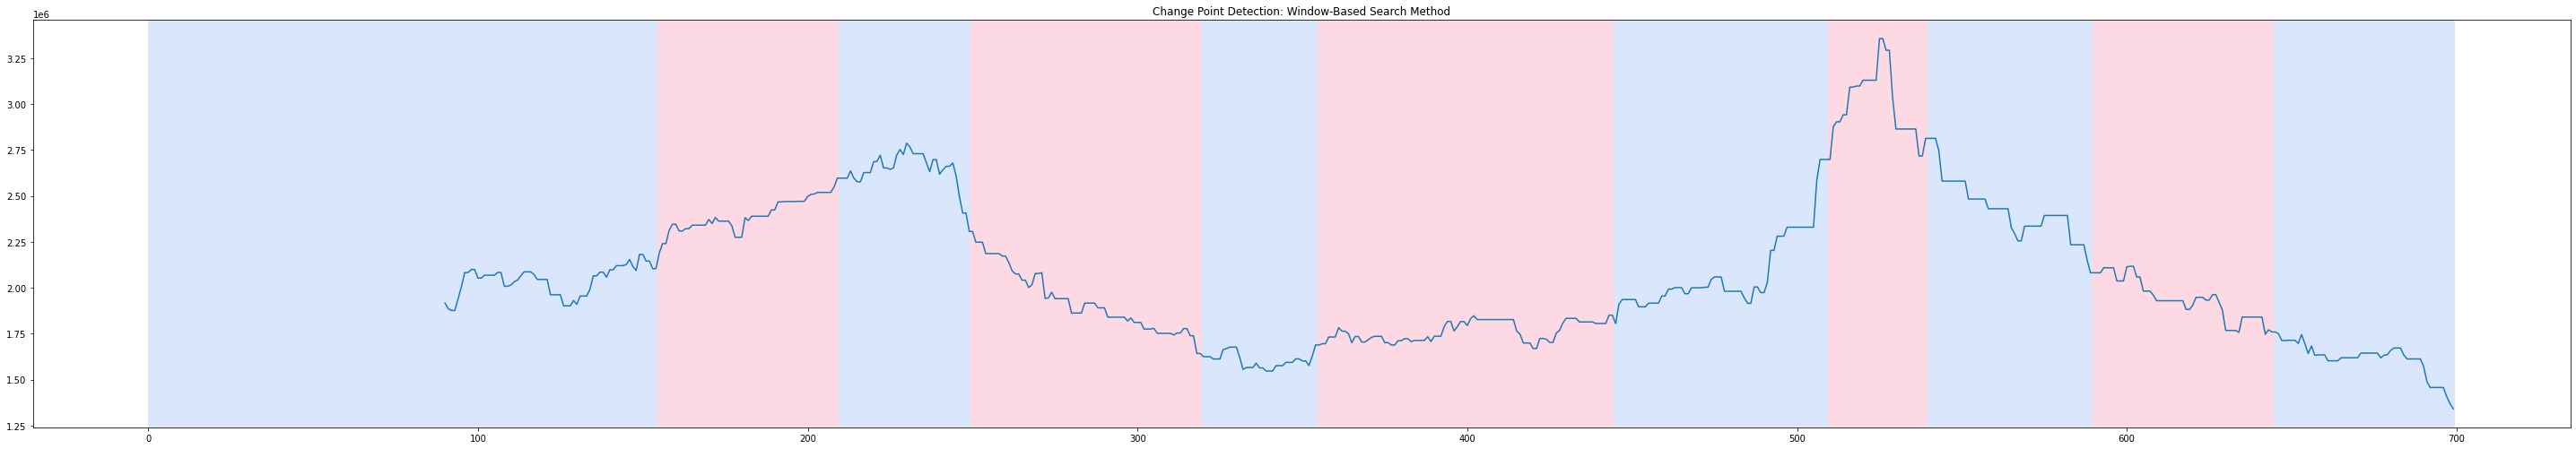

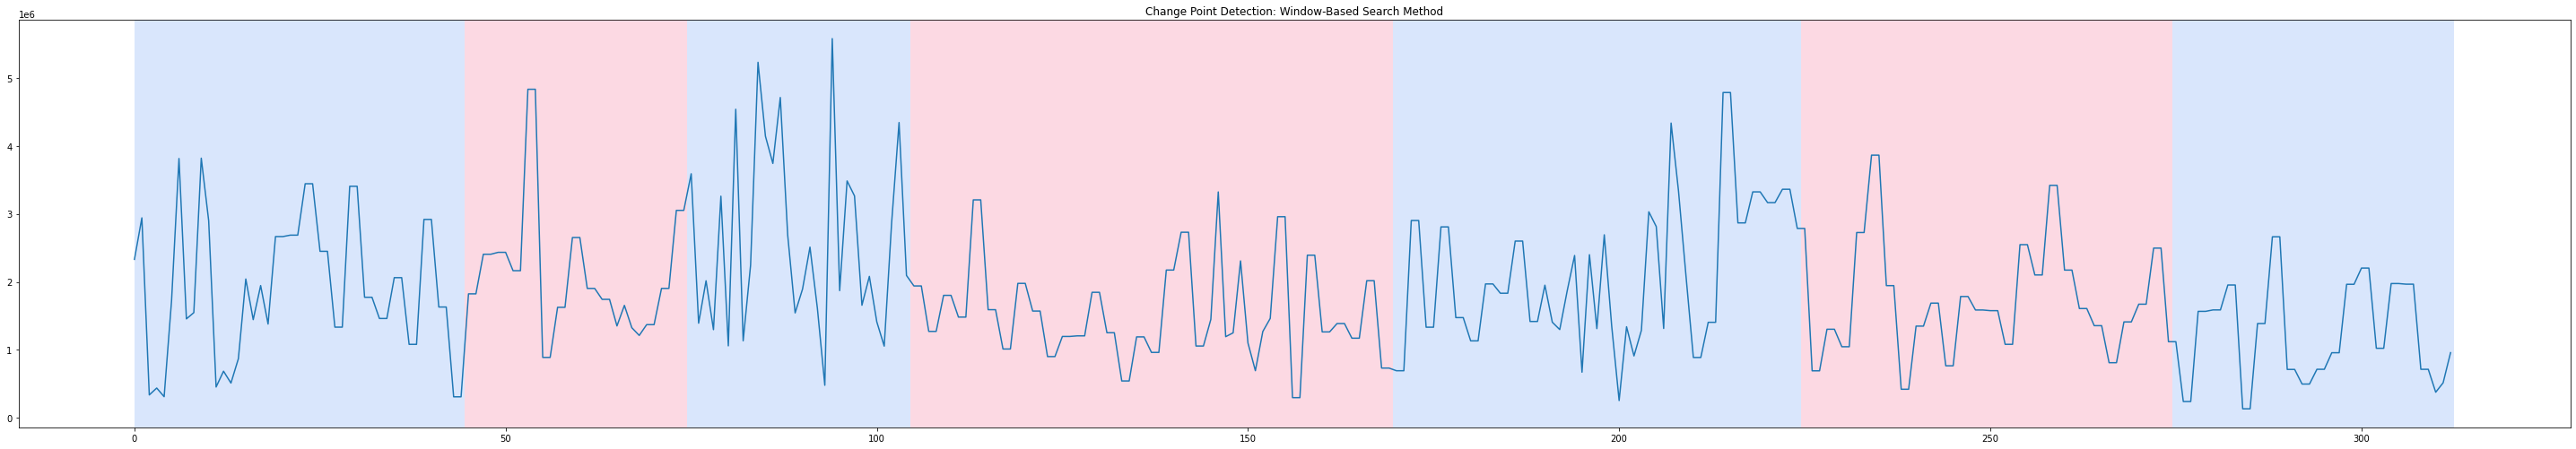

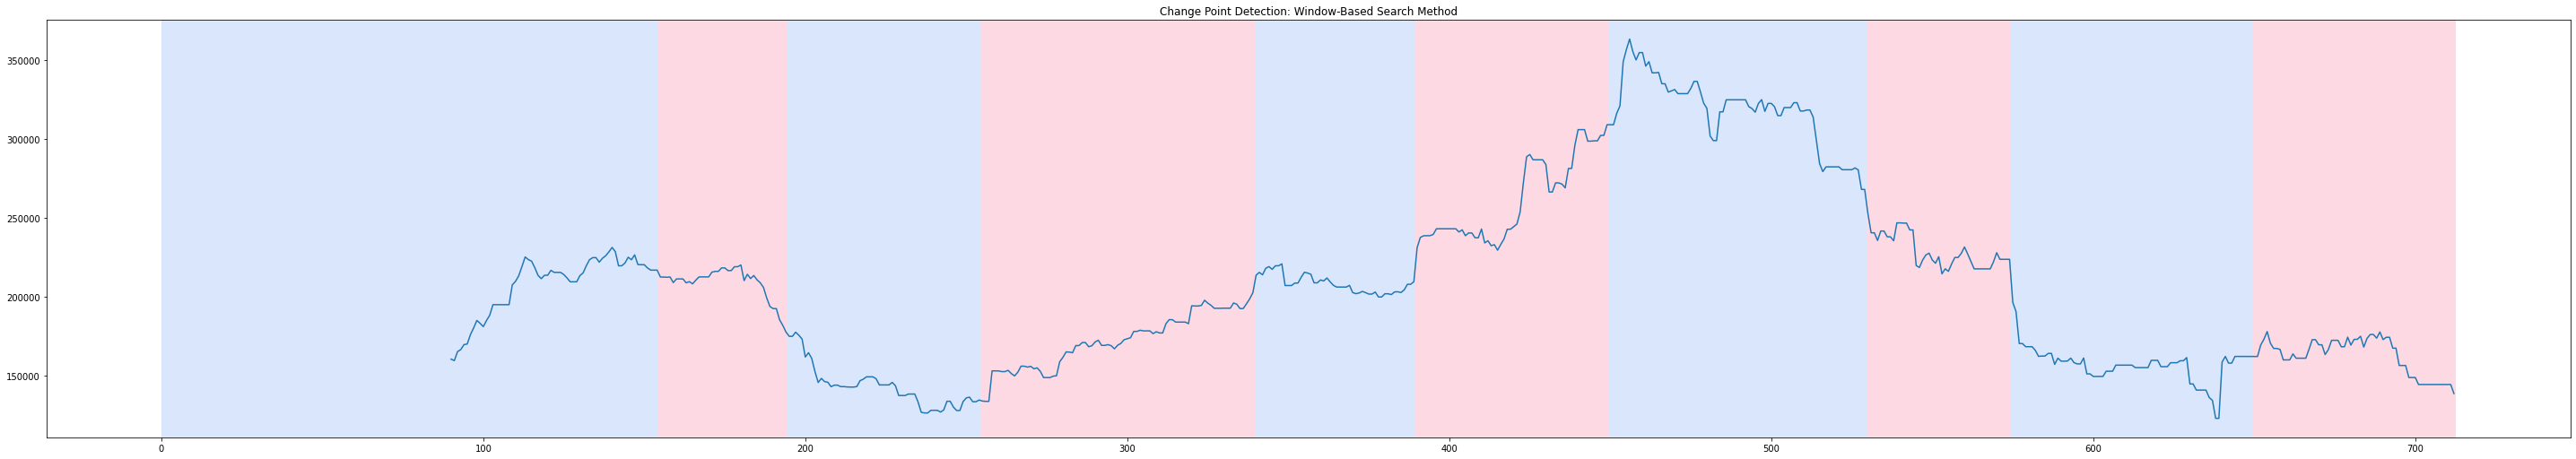

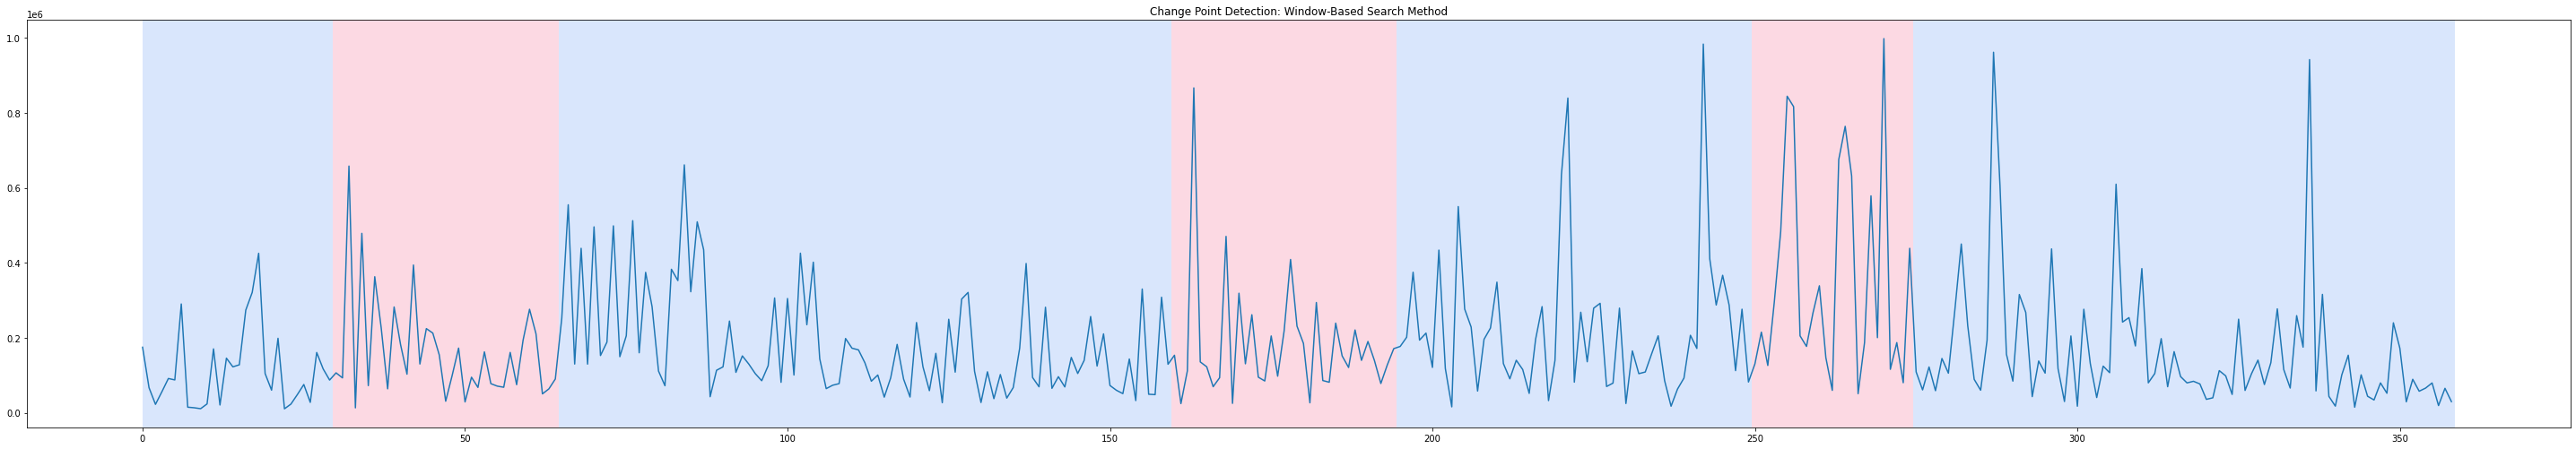

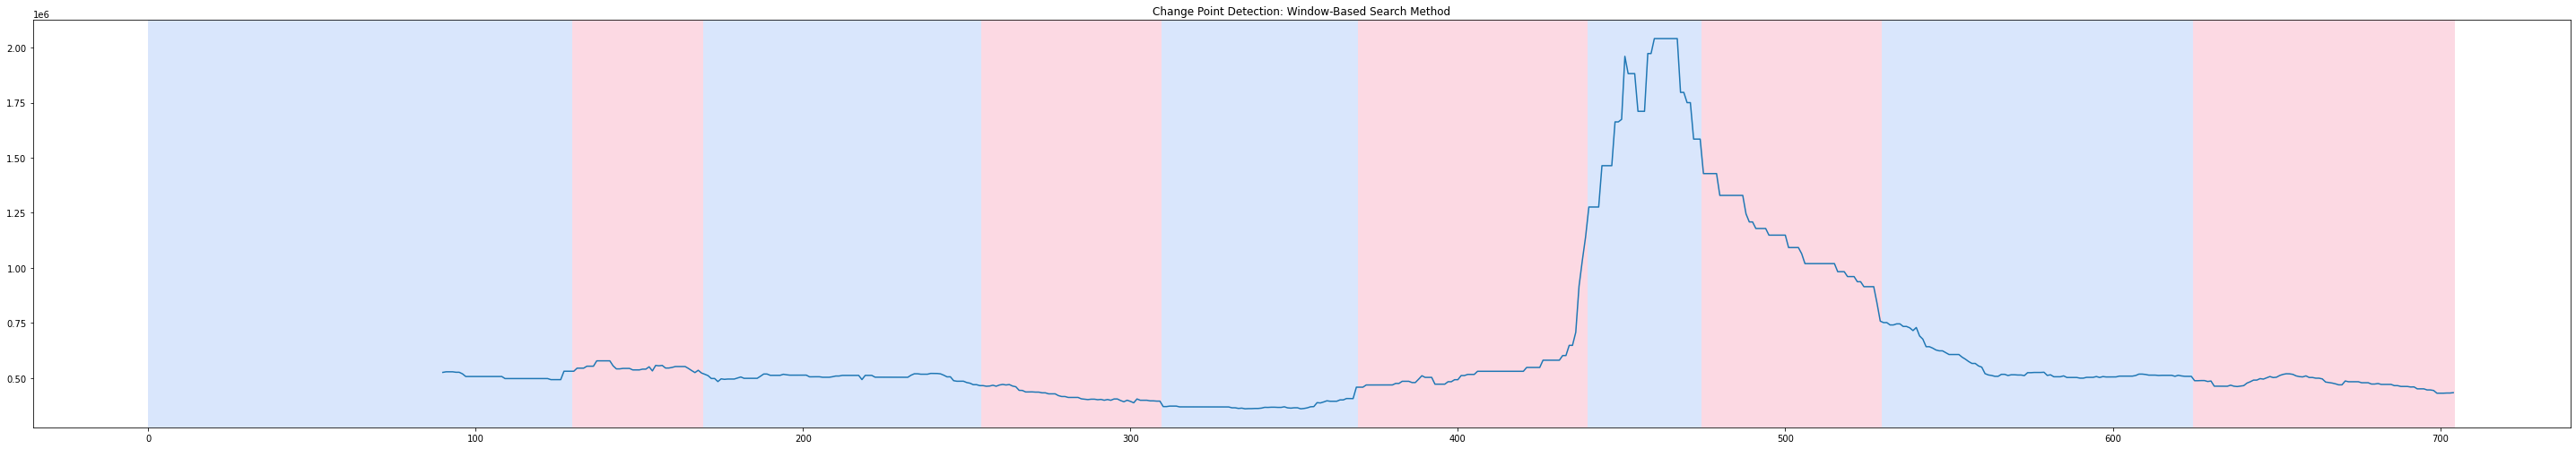

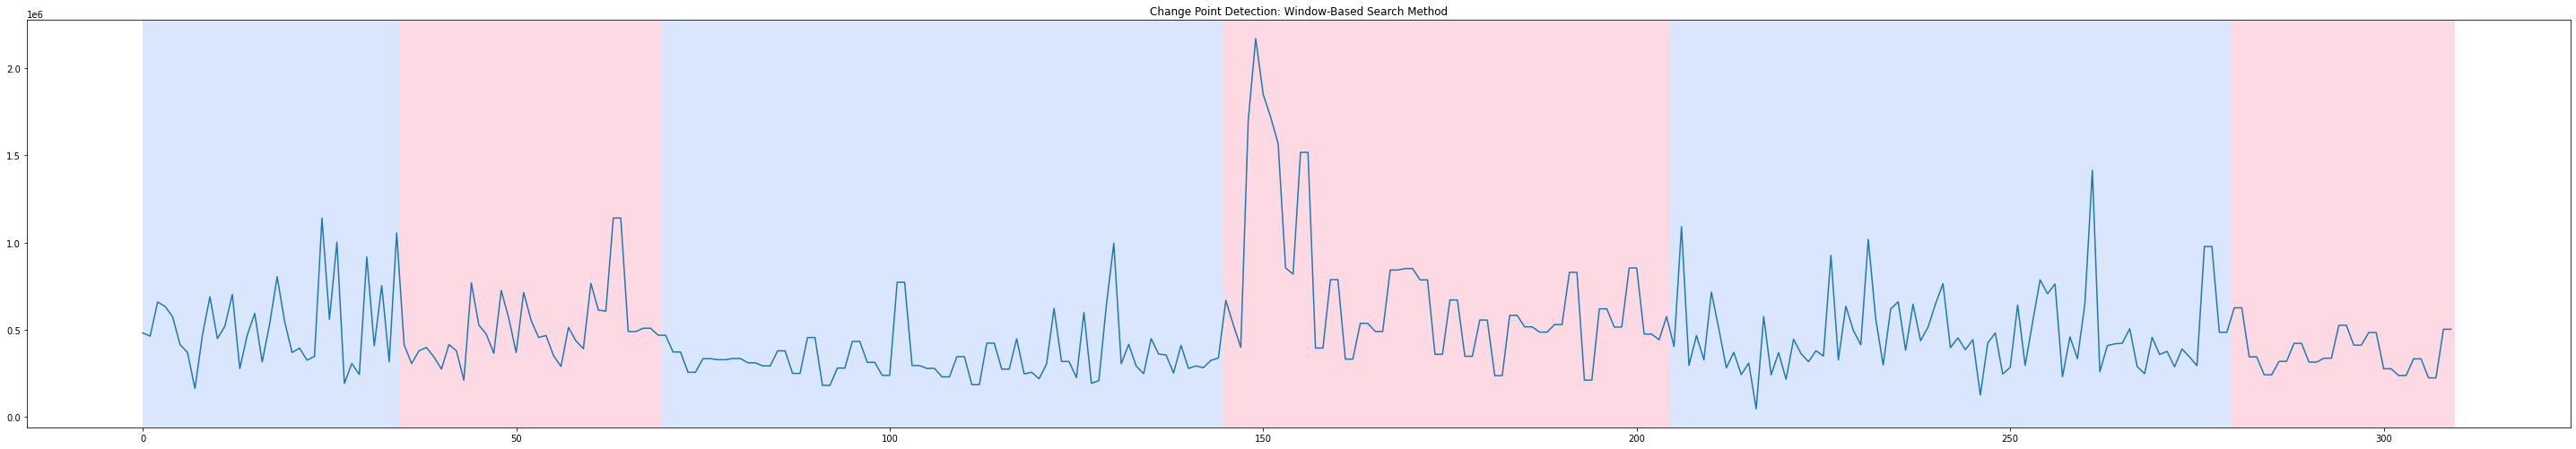

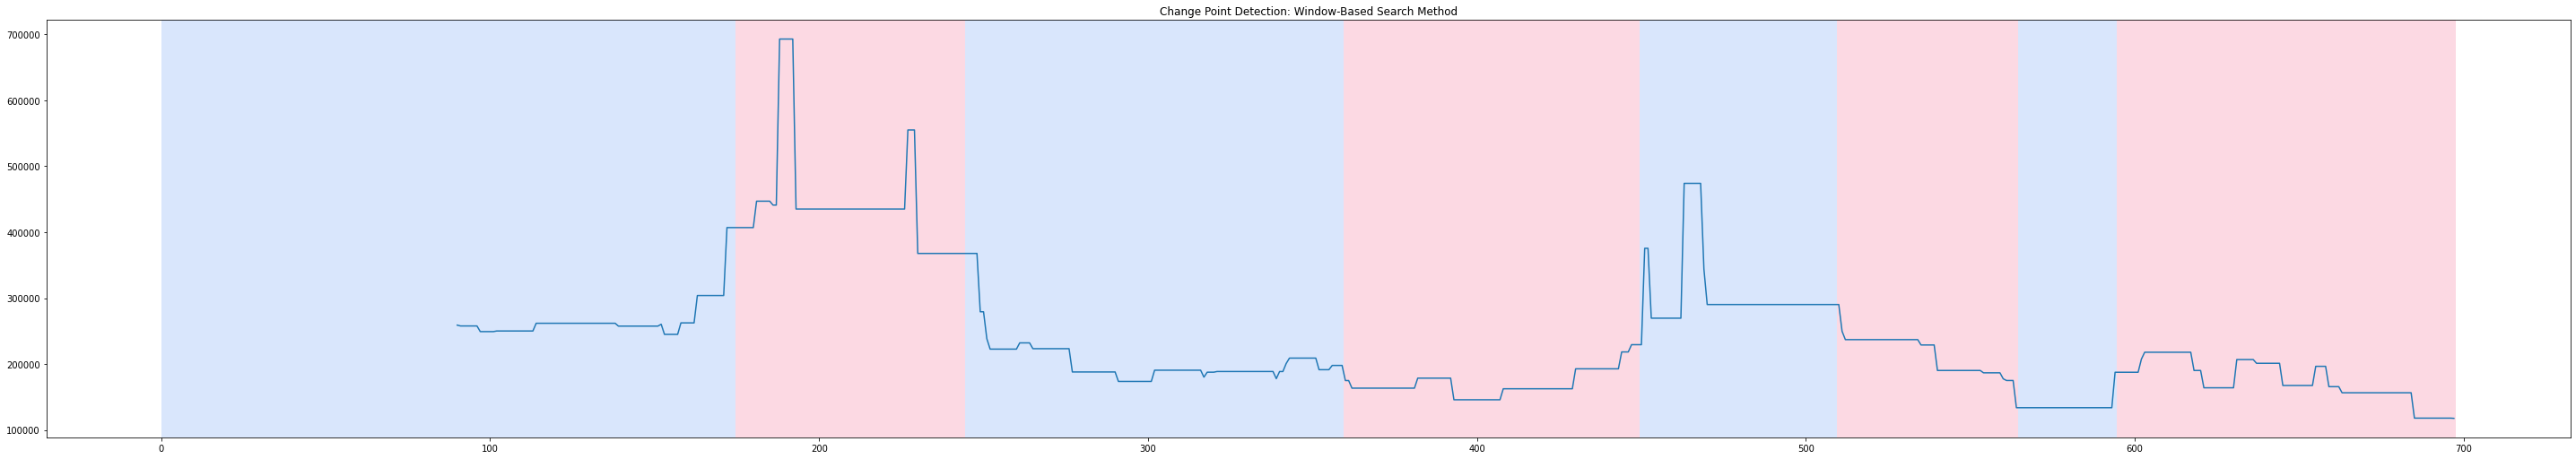

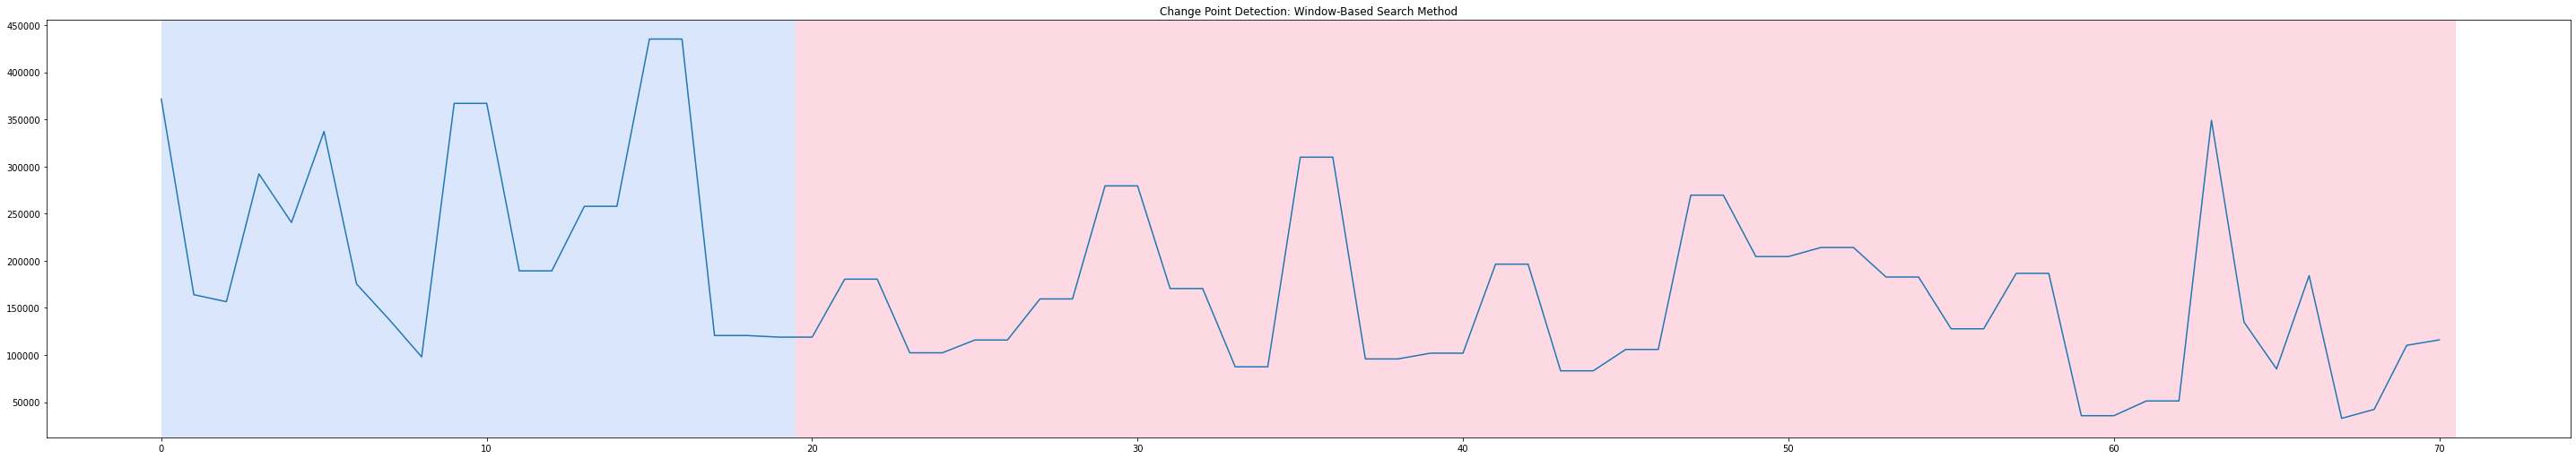

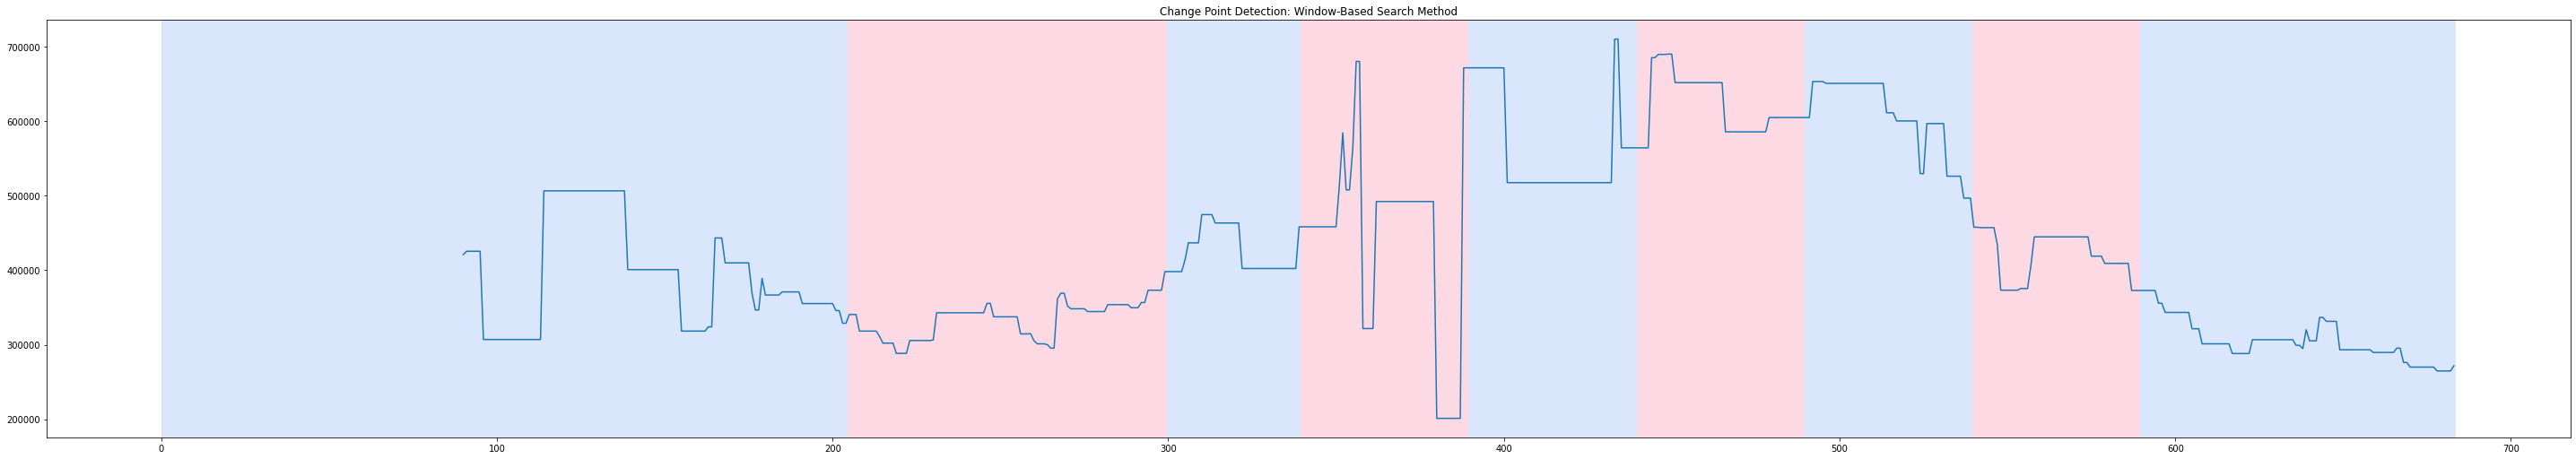

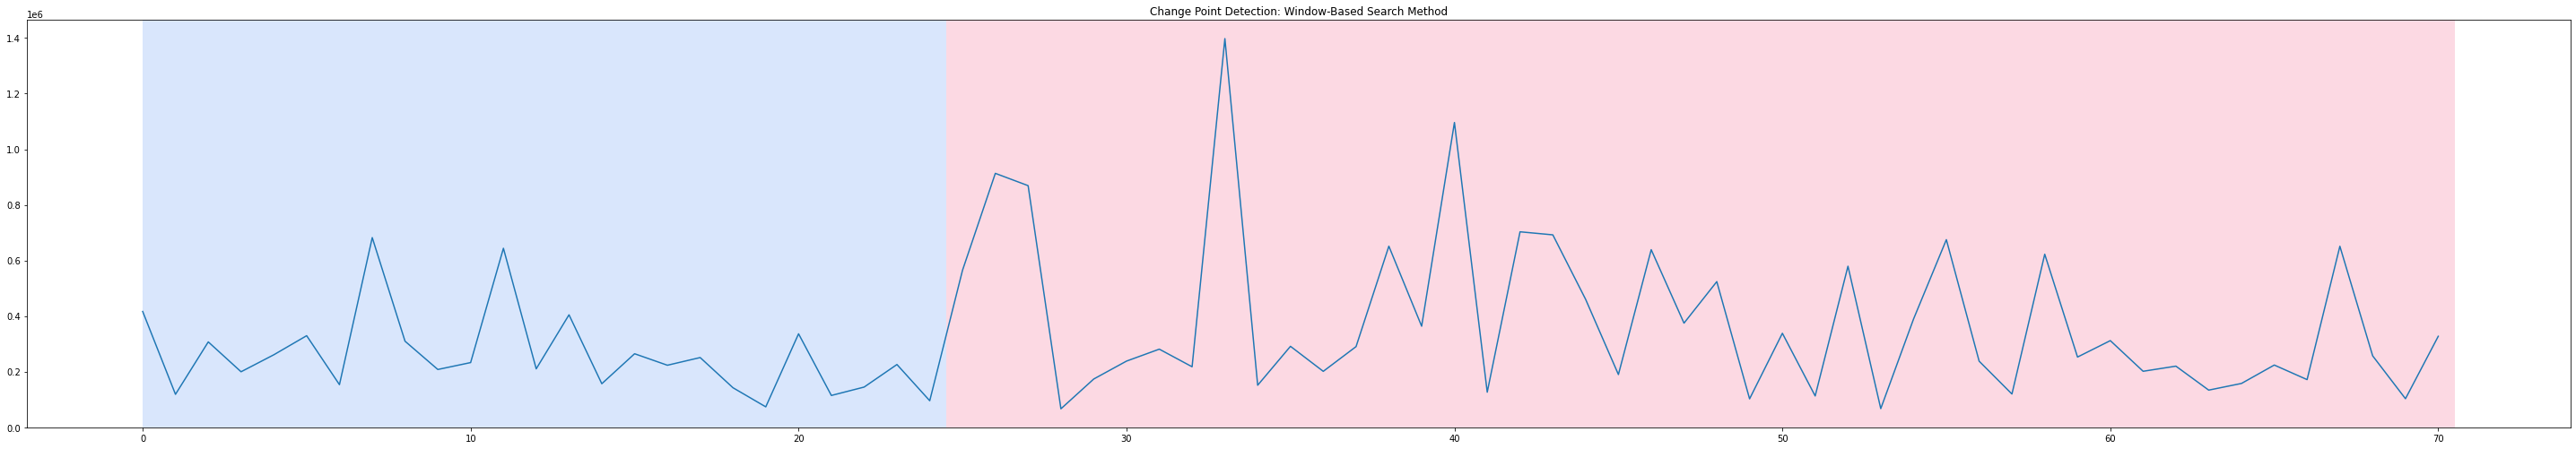

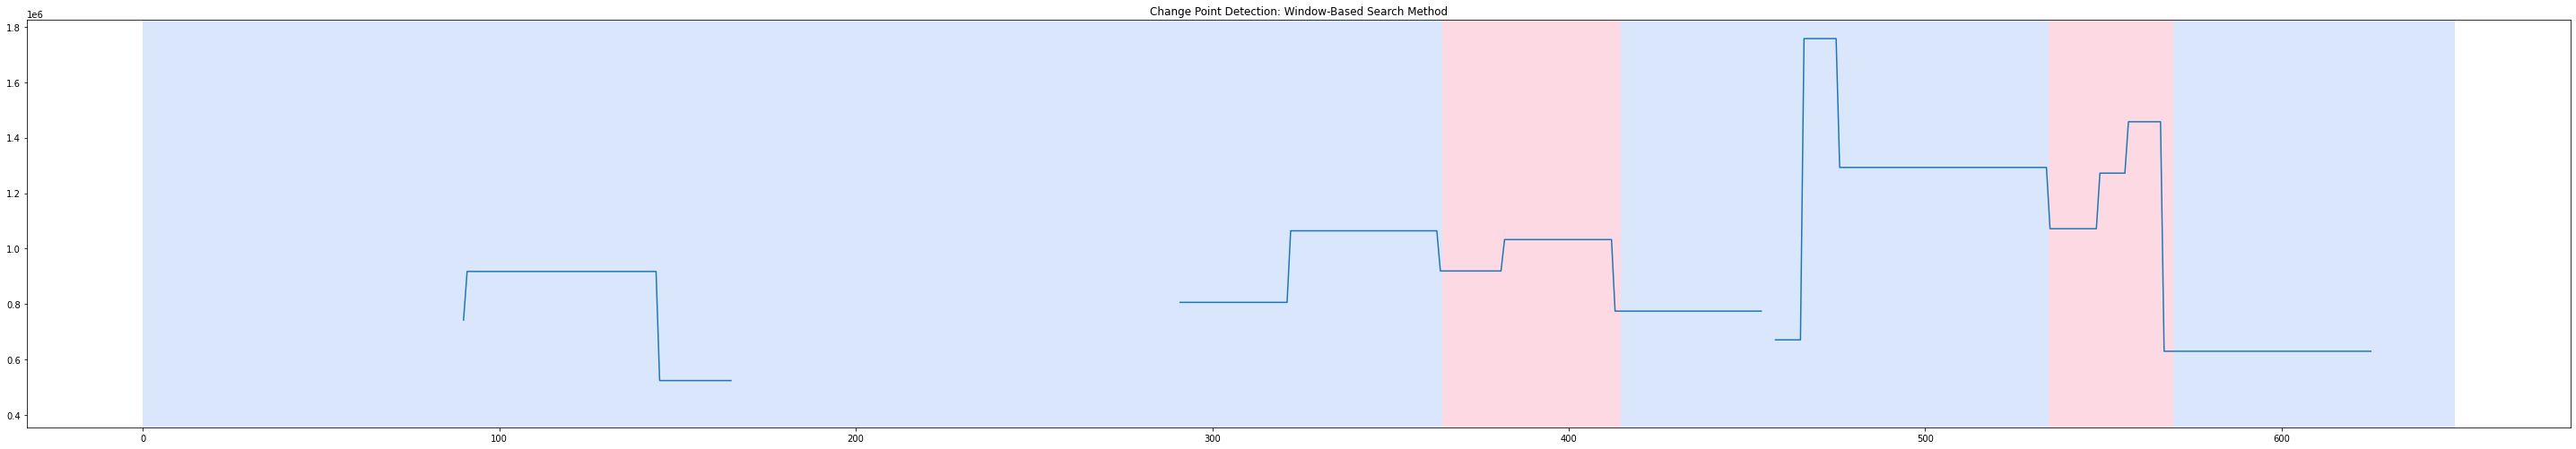

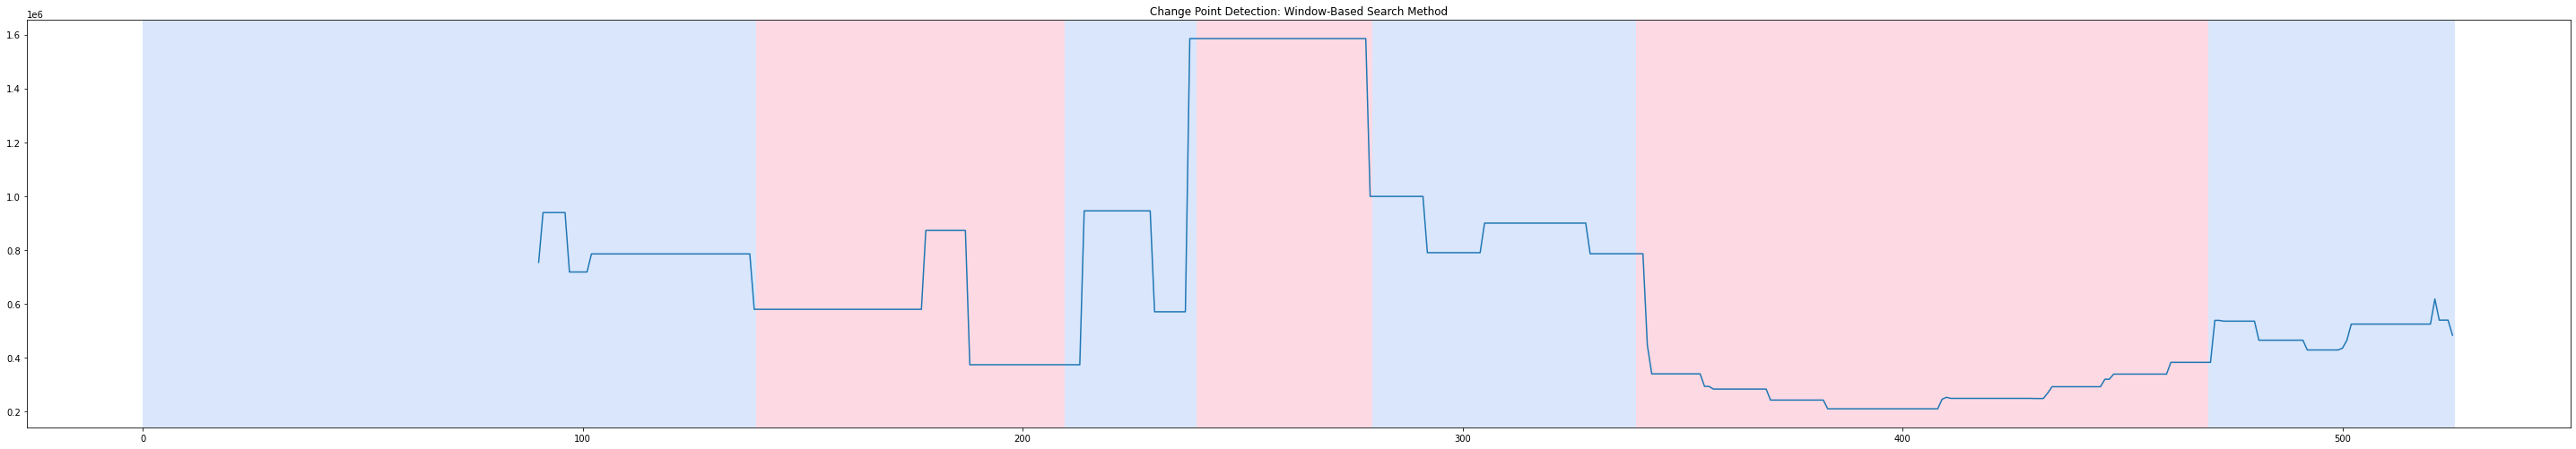

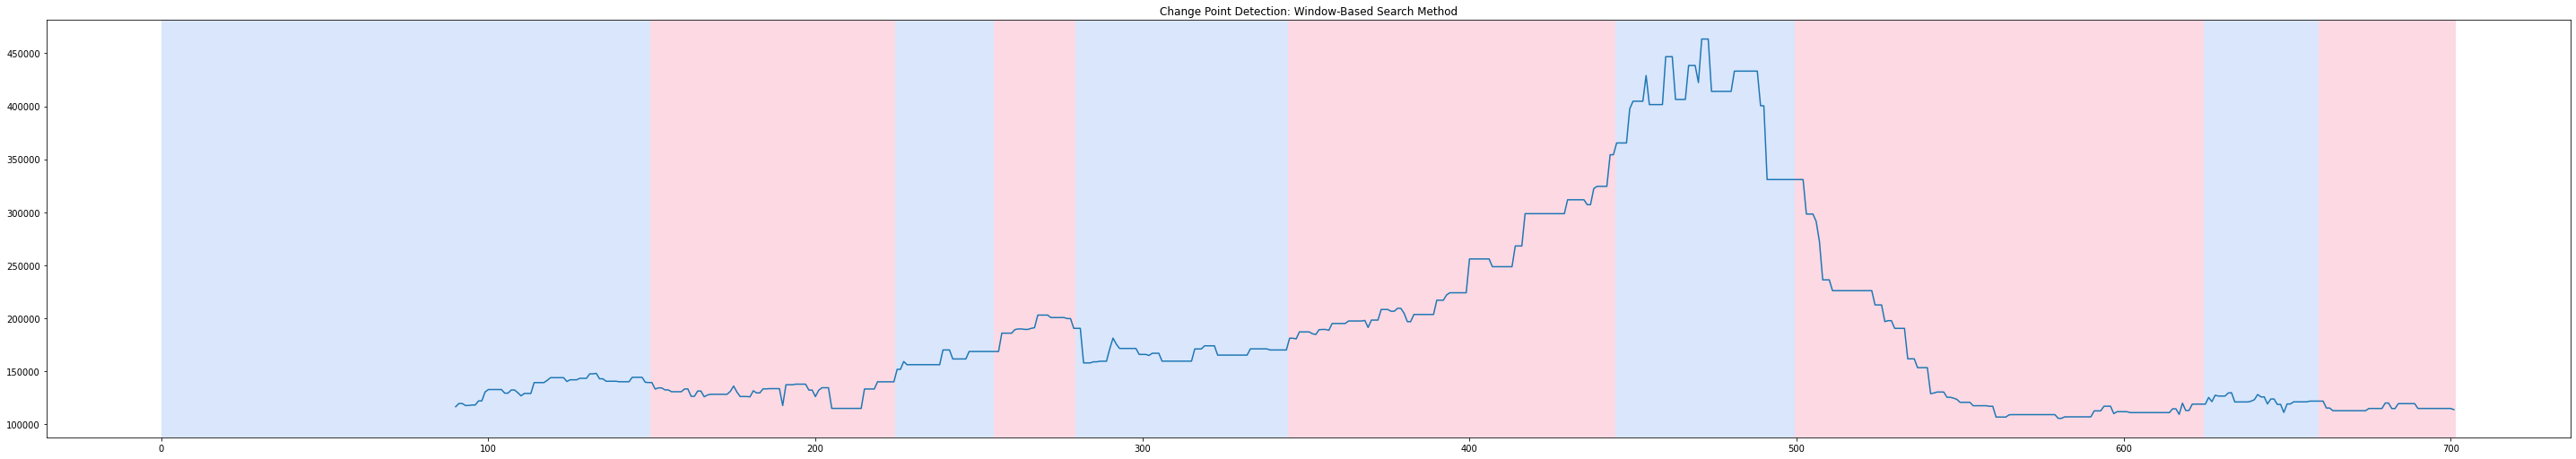

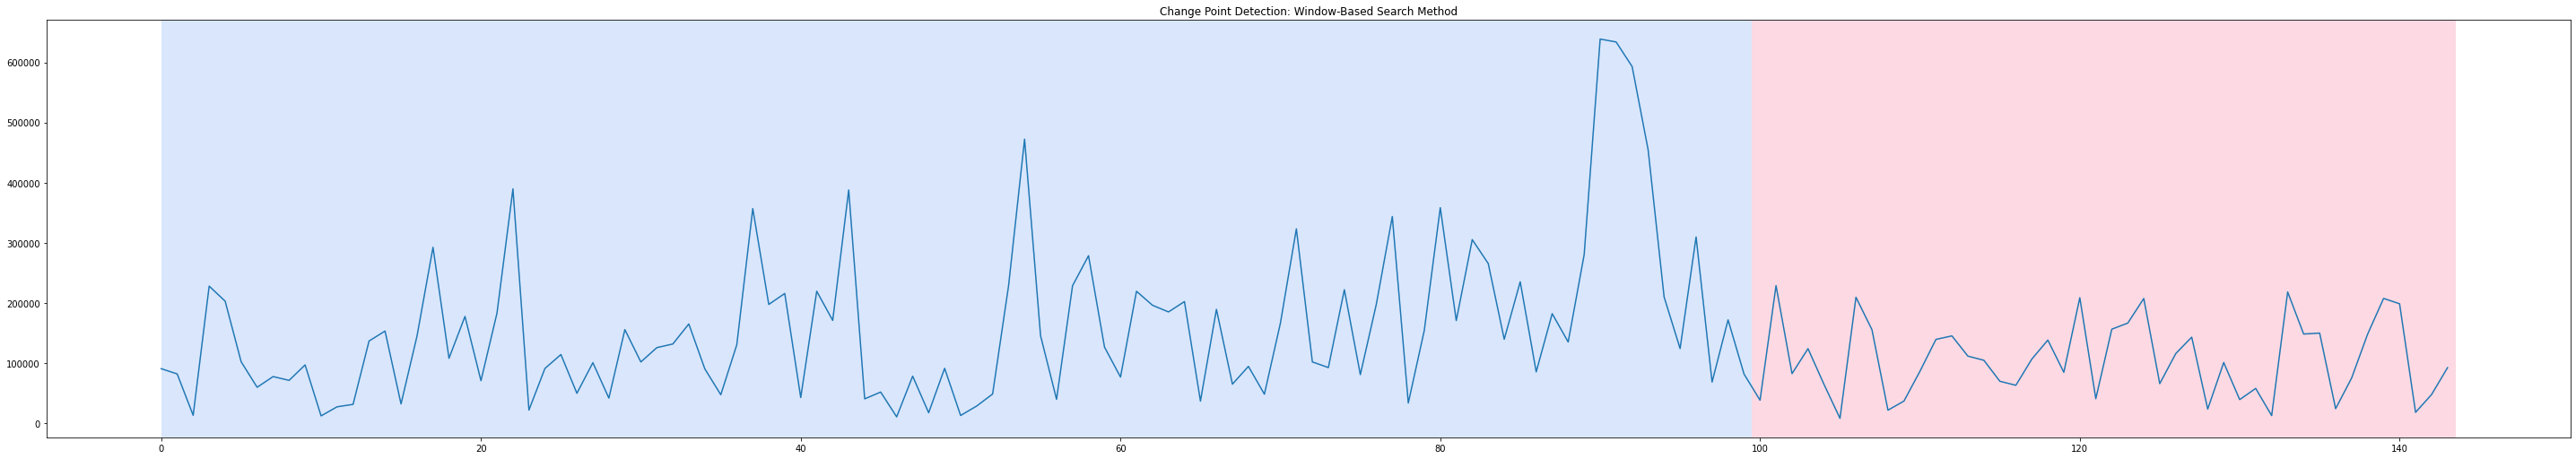

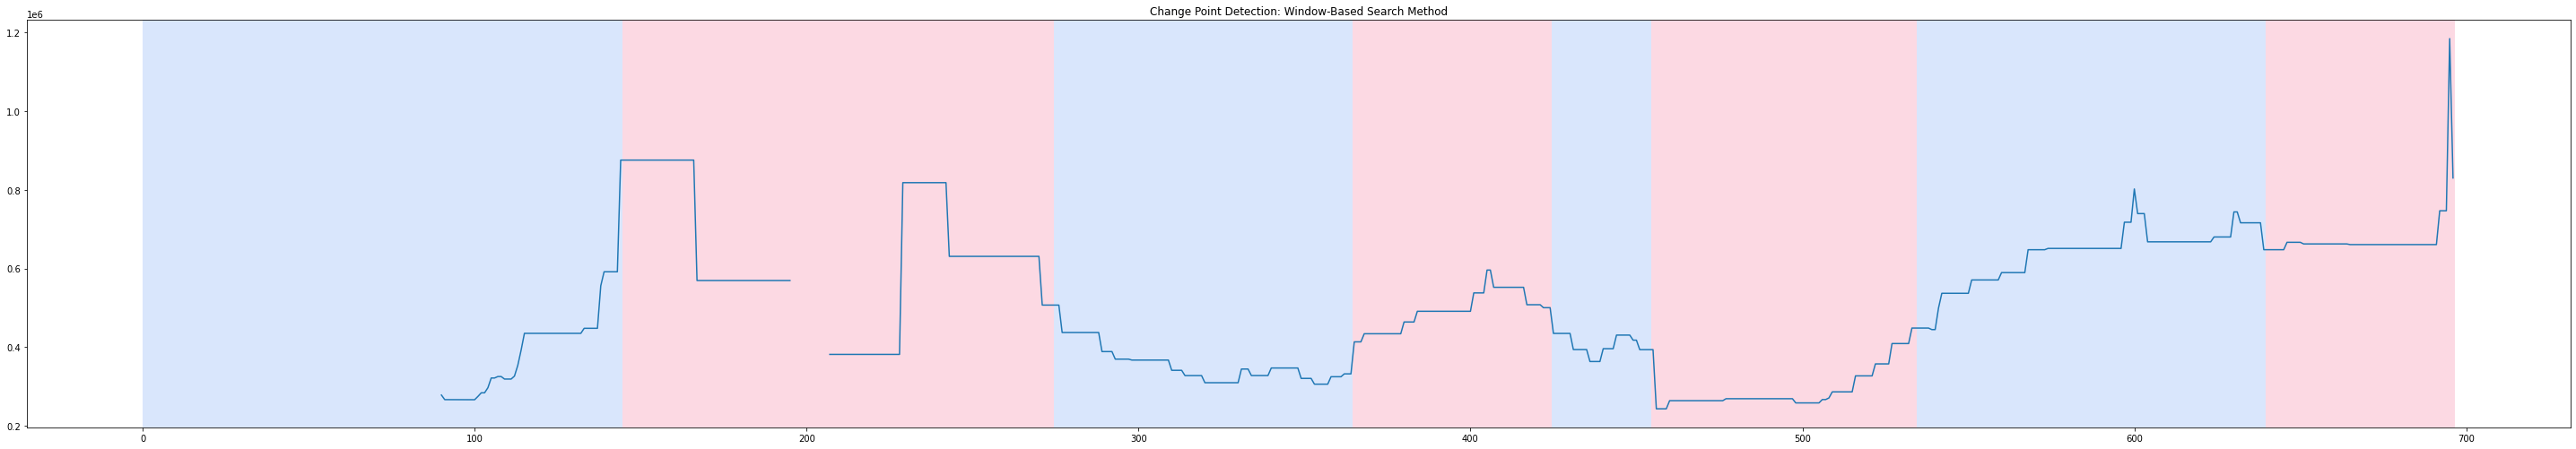

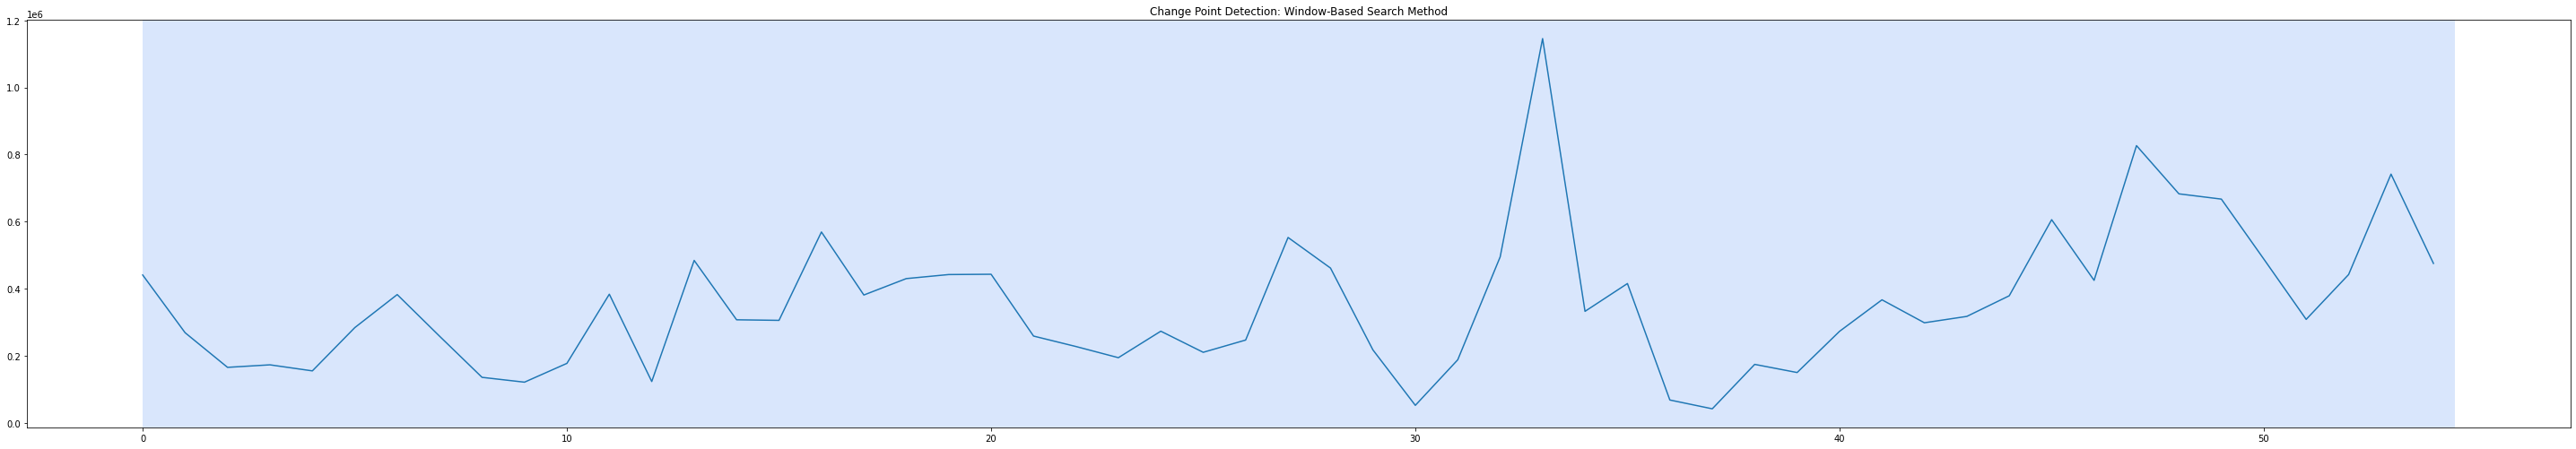

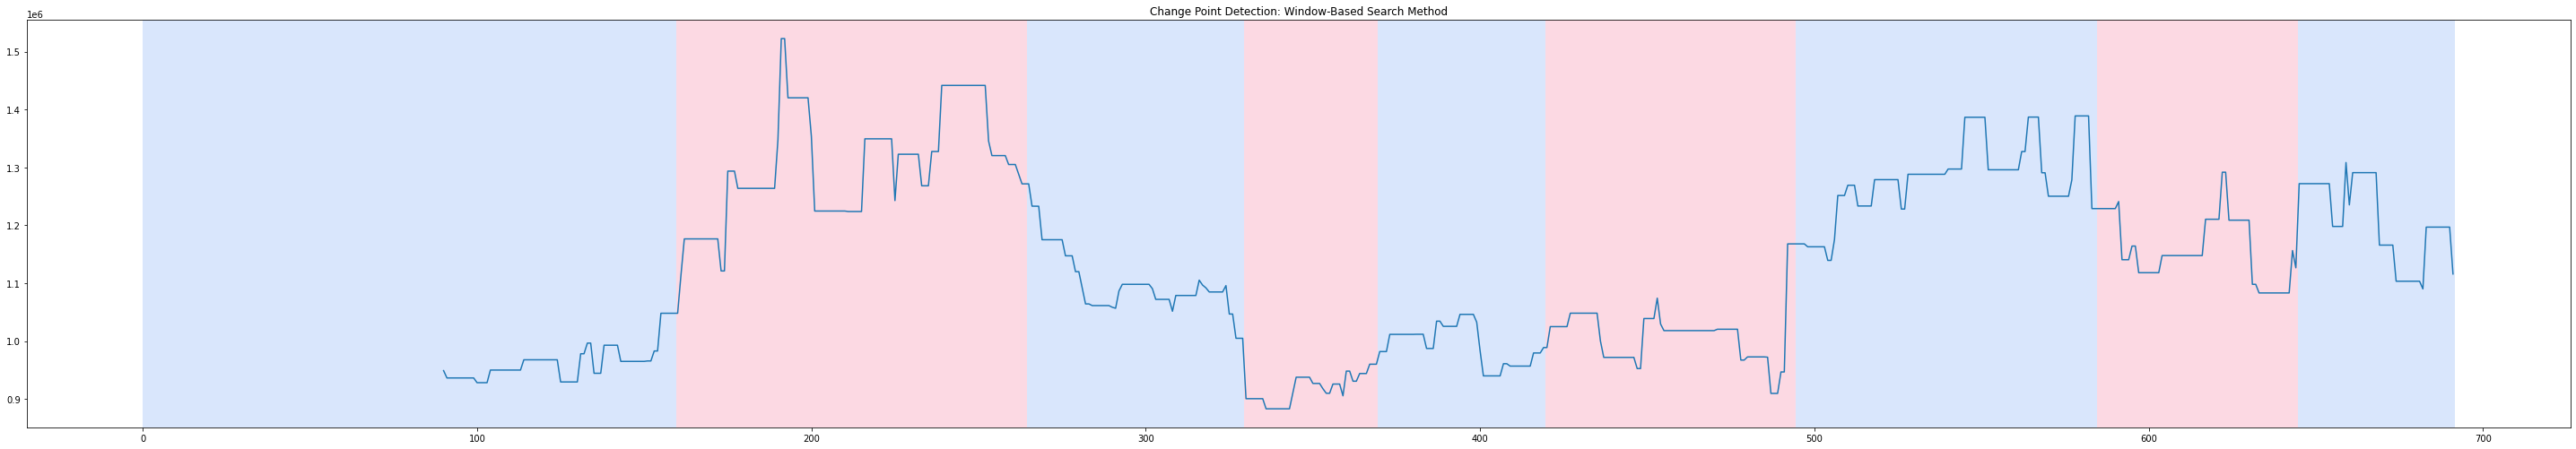

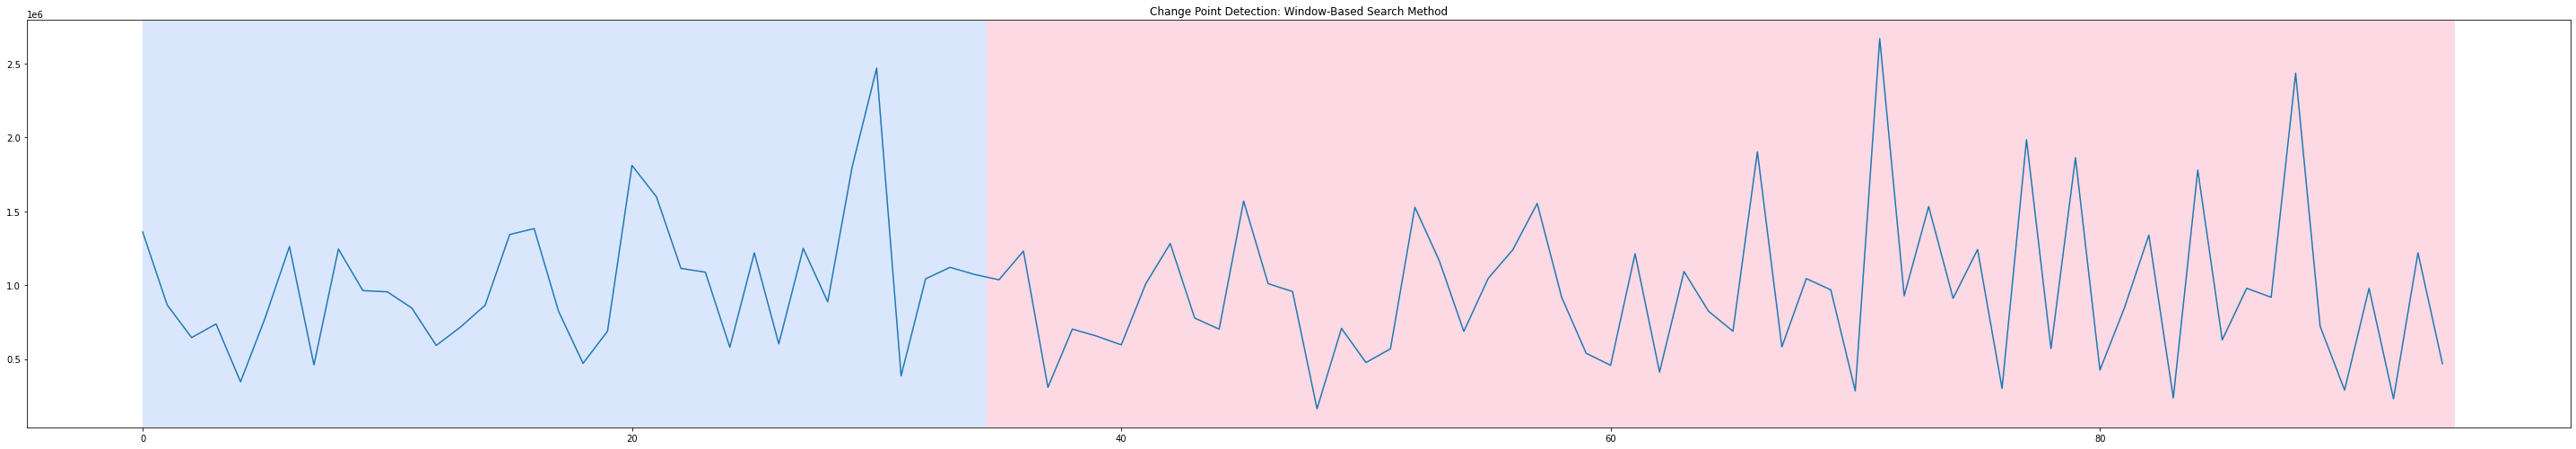

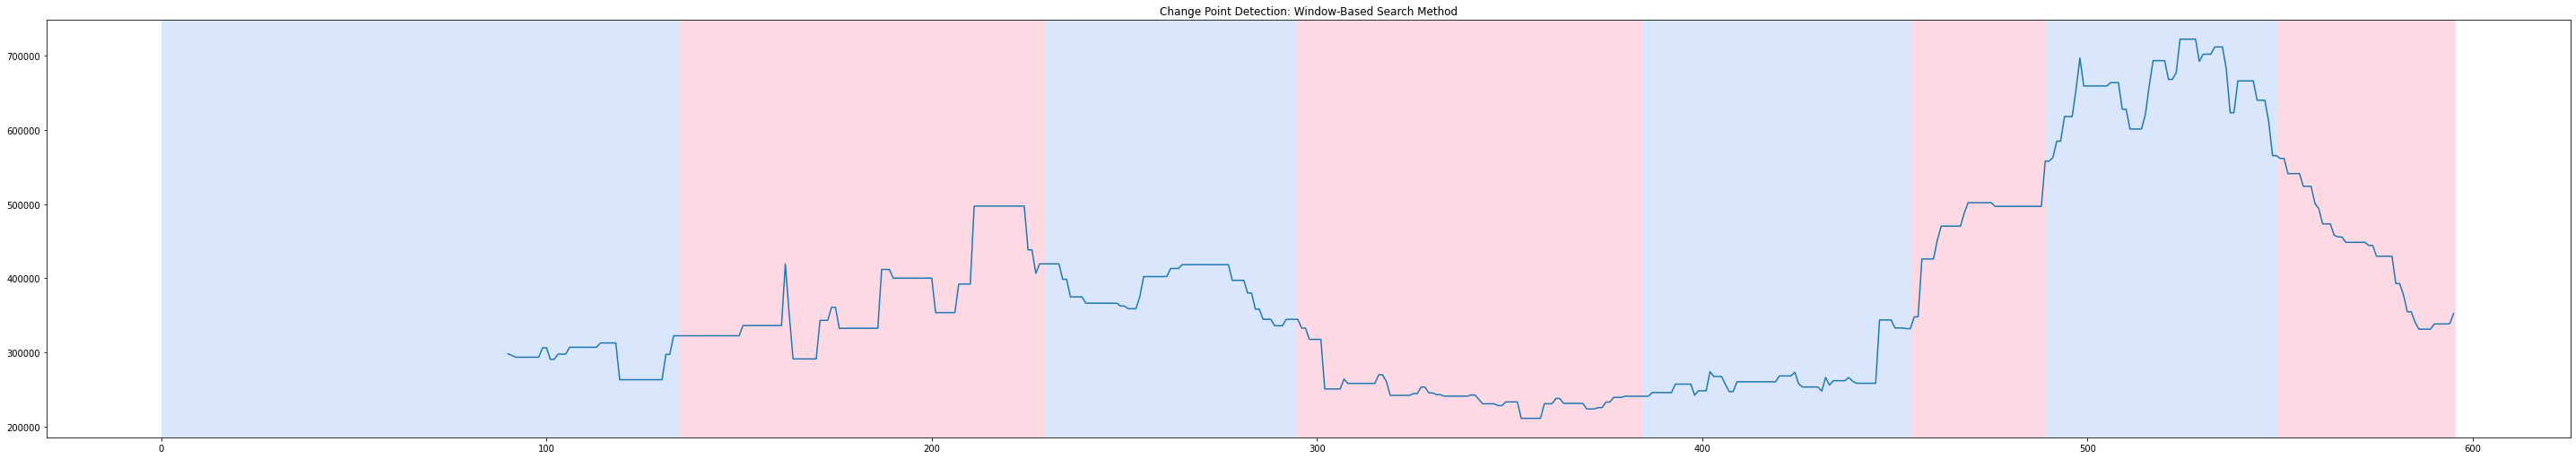

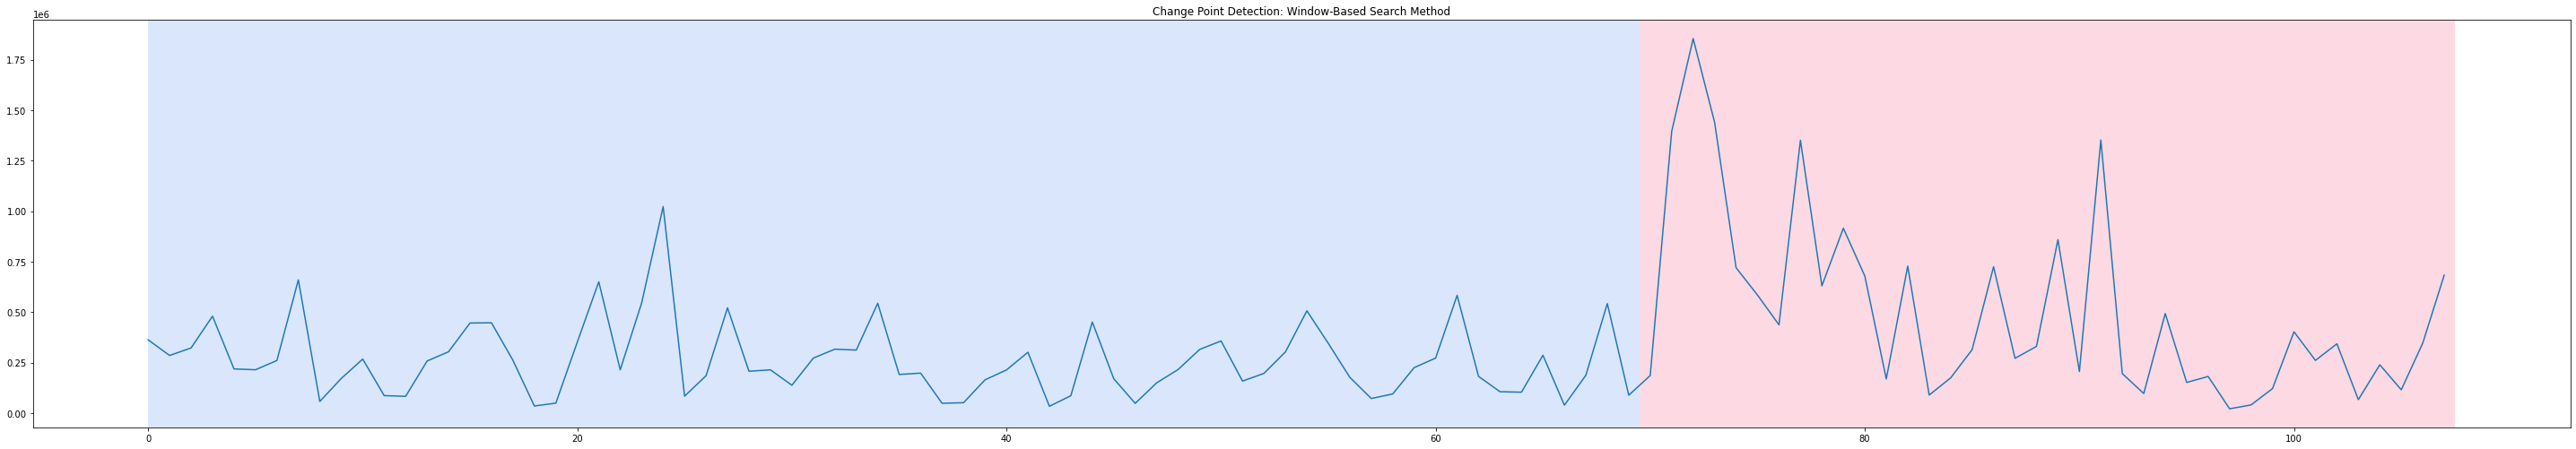

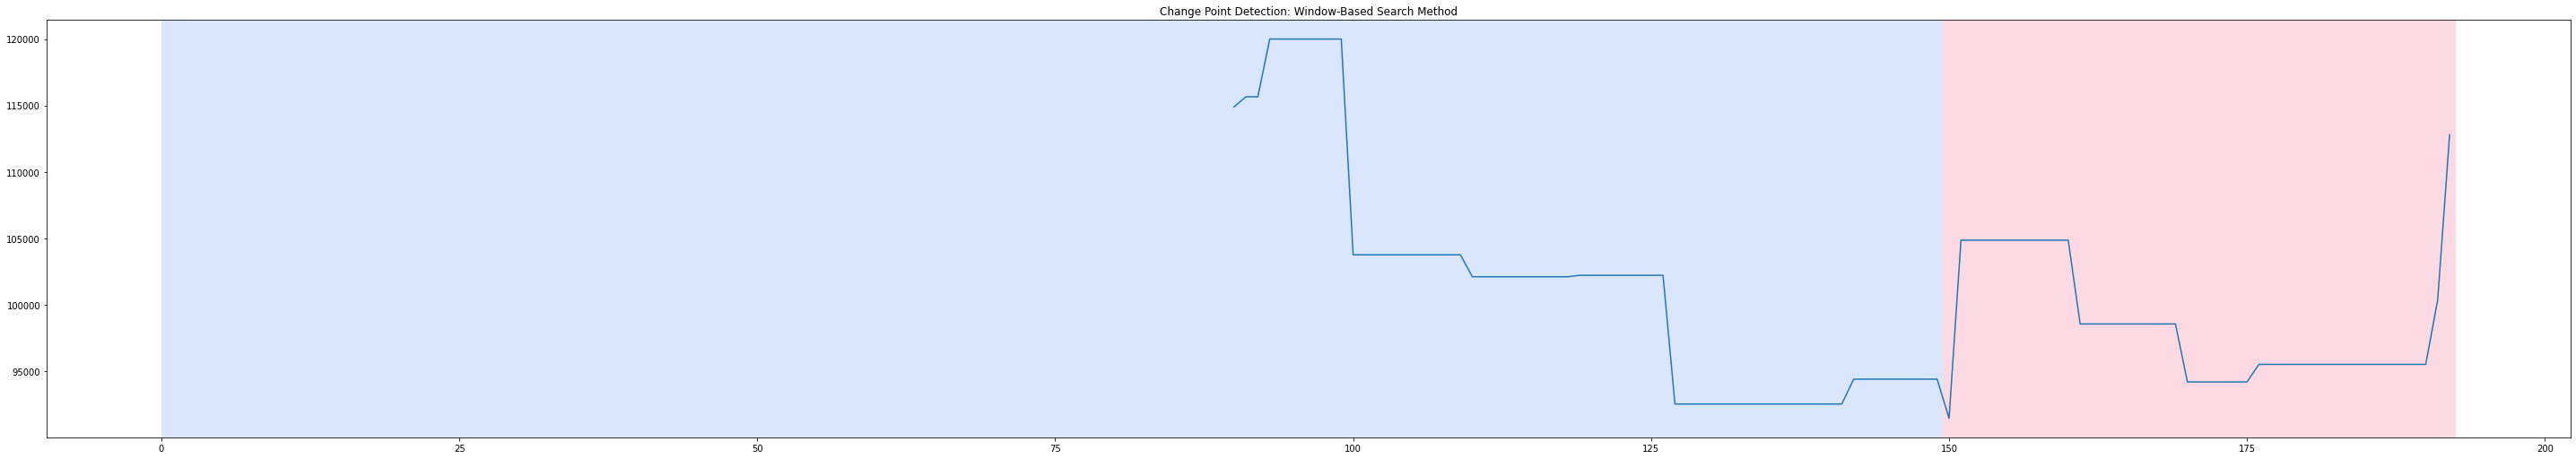

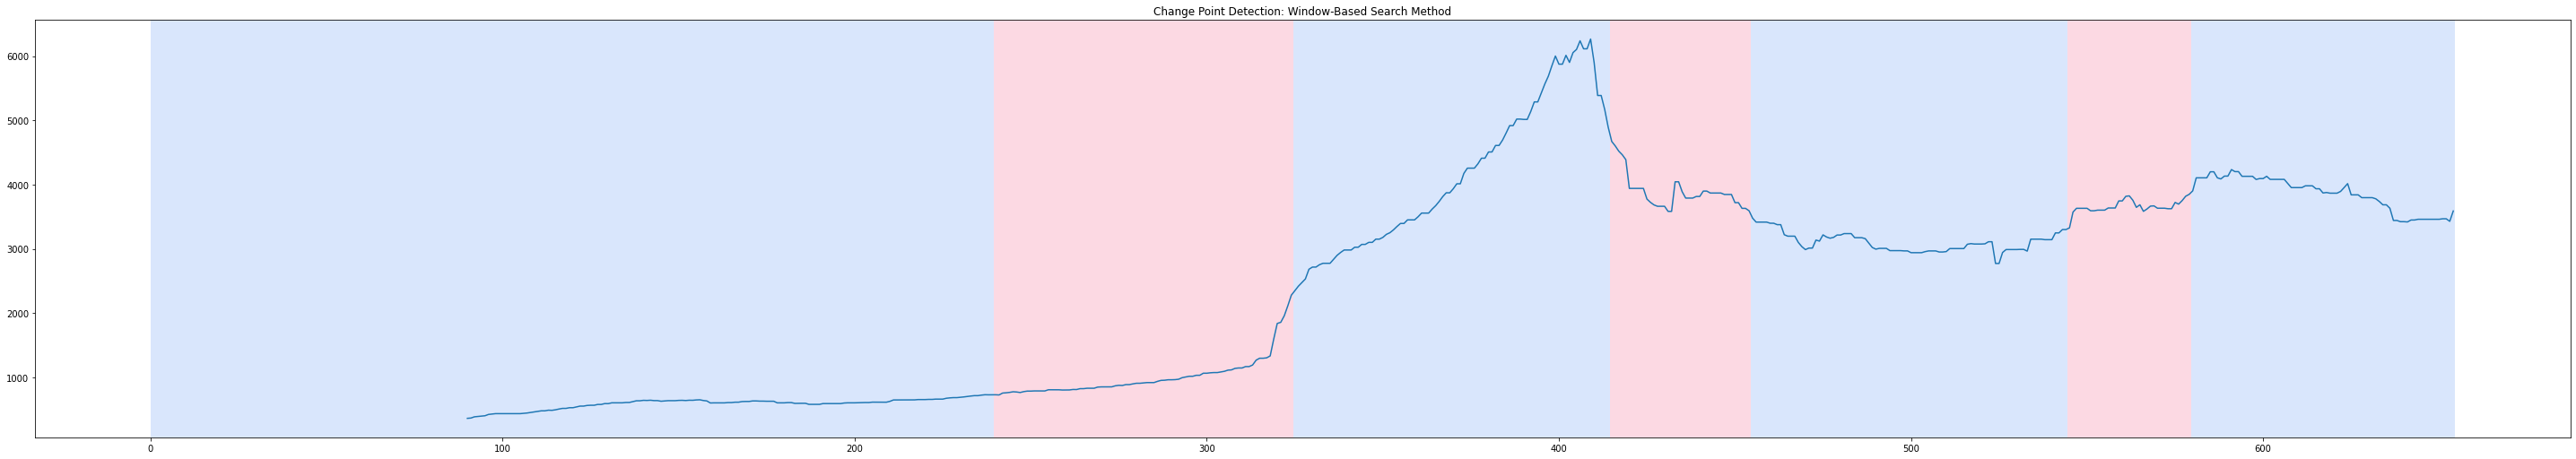

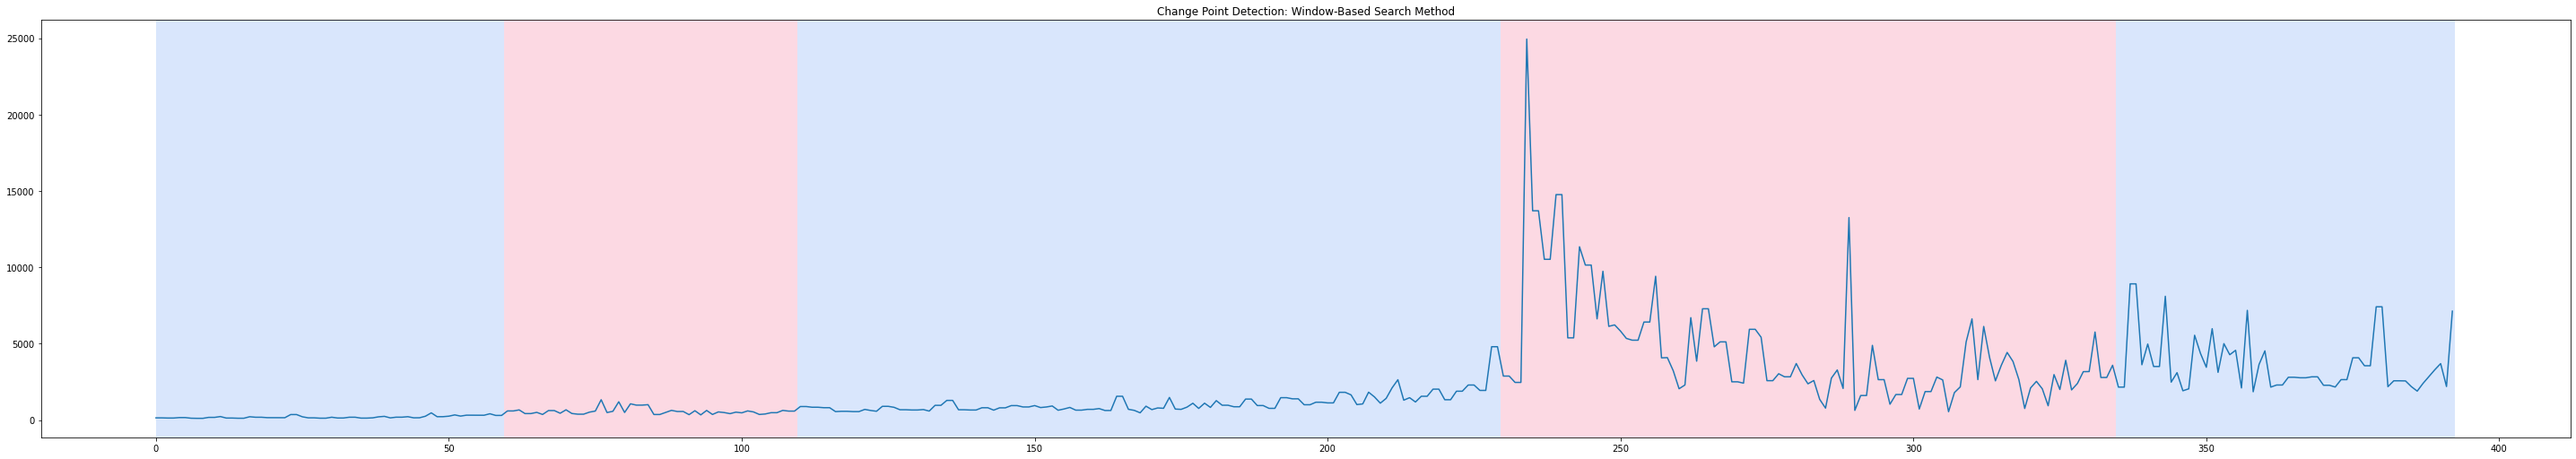

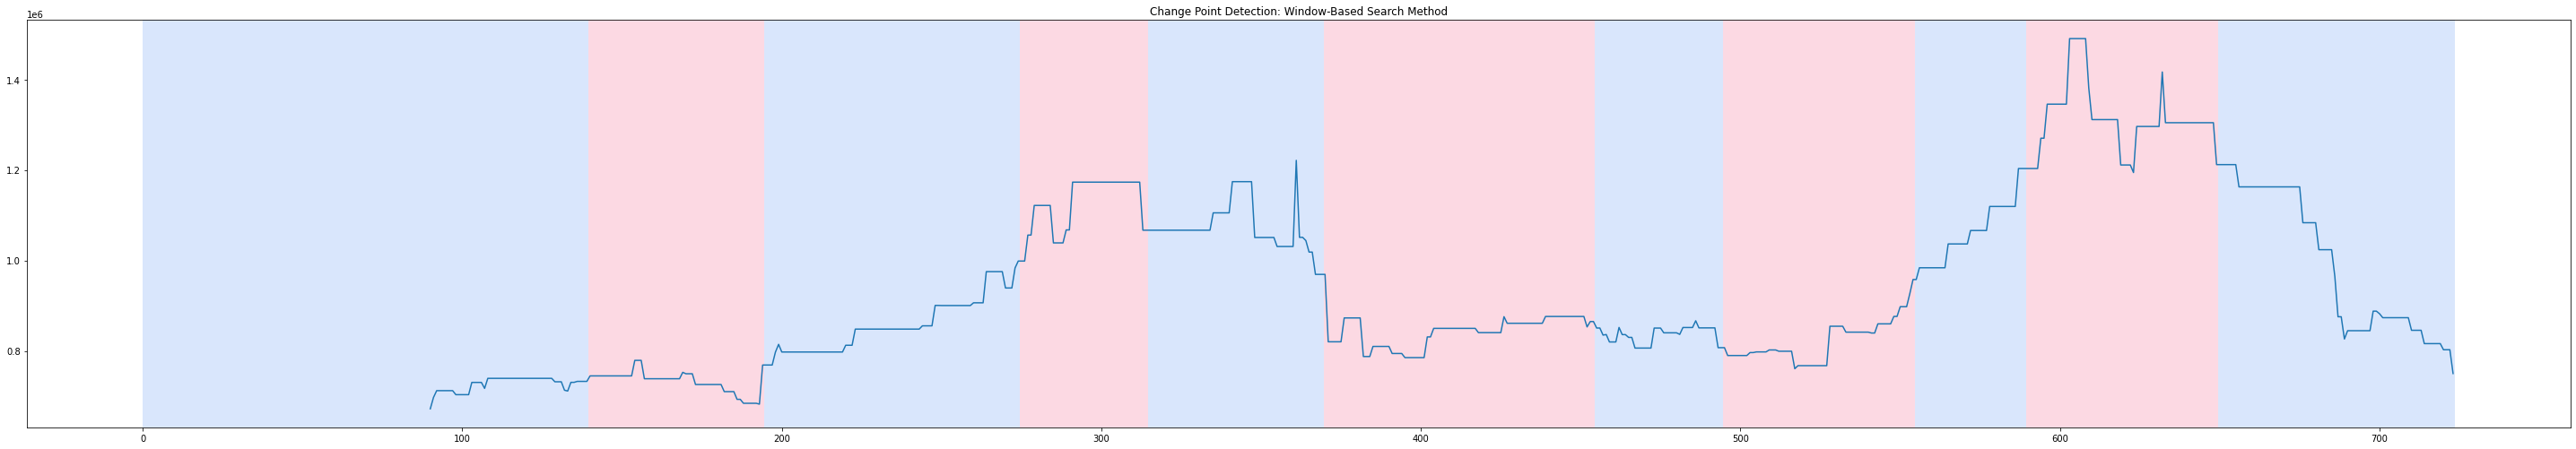

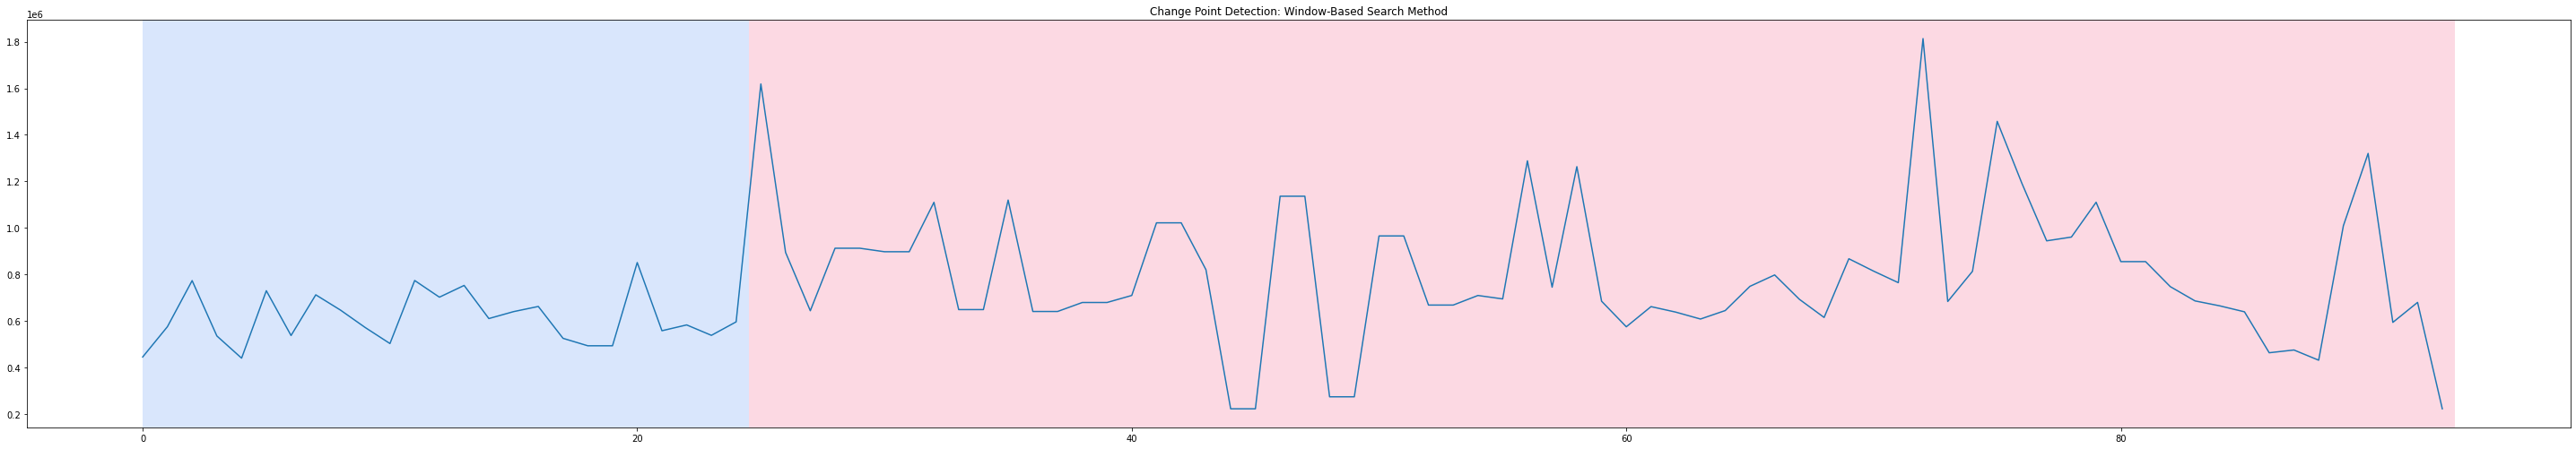

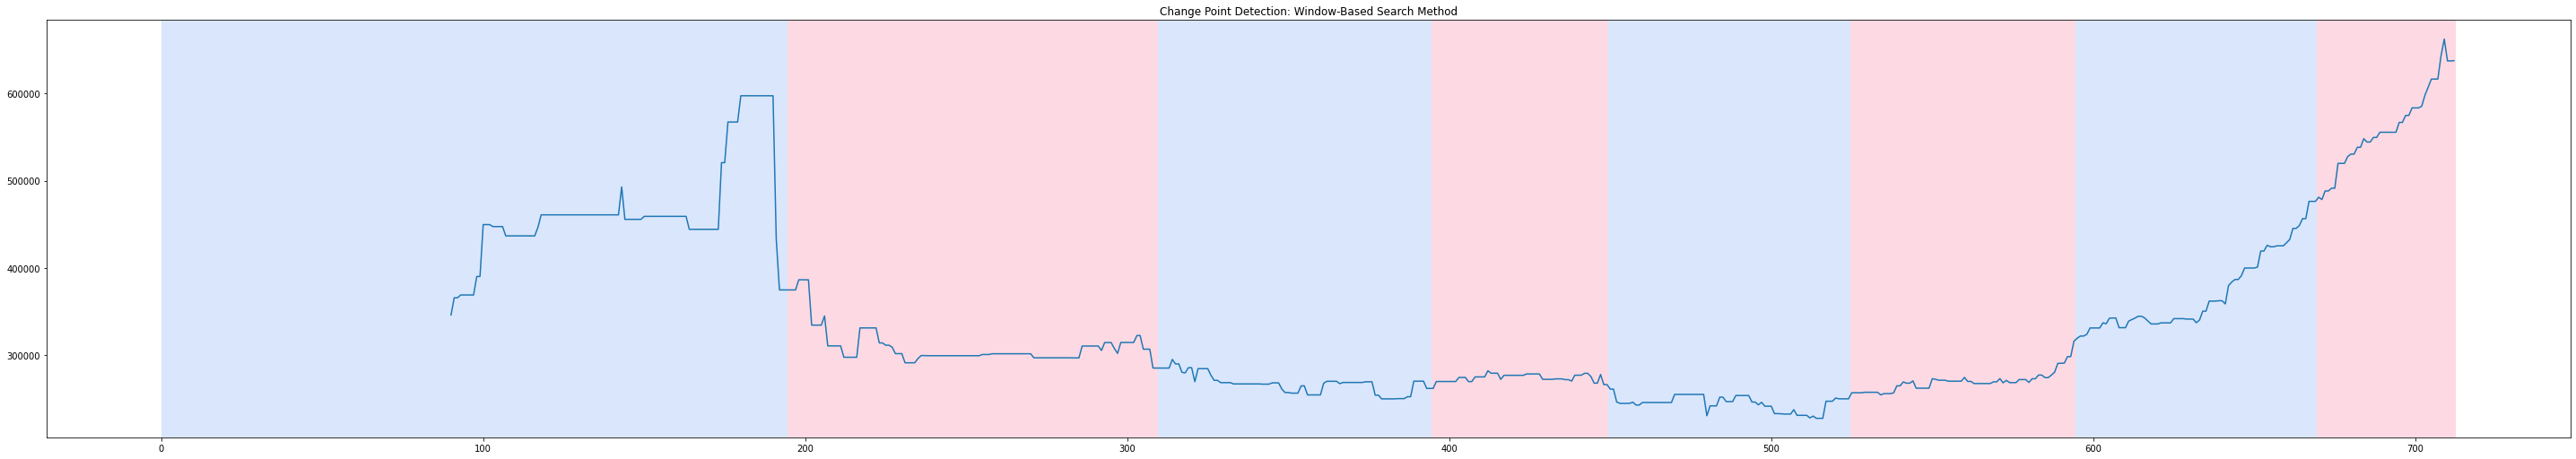

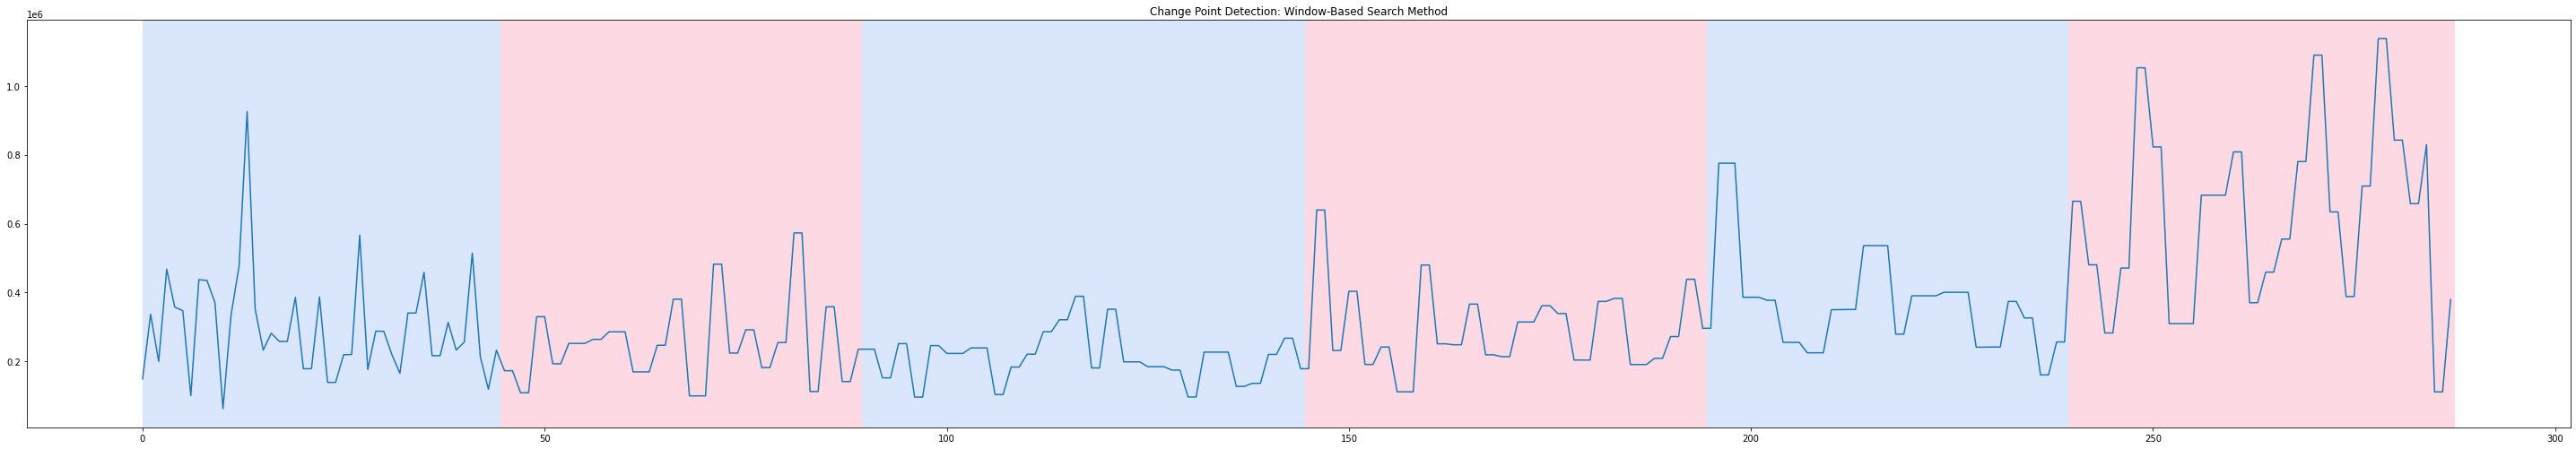

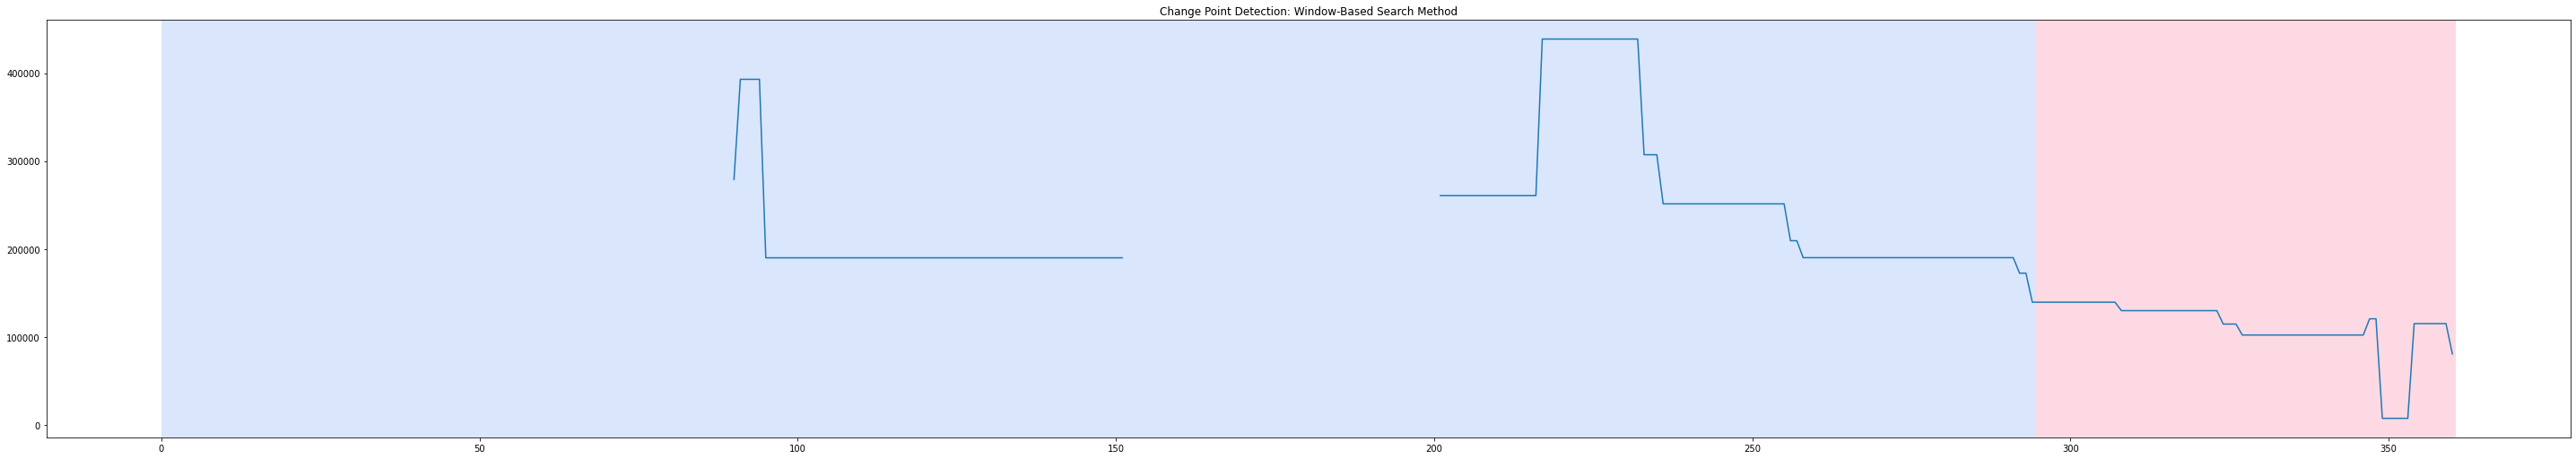

['kingjames' 'damianlillard' 'giannis_an34' 'ygtrece' 'kyrieirving'
 'EasyMoneySniper' 'jharden13' 'cp3' 'zo' 'stephencurry30' 'russwest44'
 'jordan_poole' 'jokicnikolaofficial' 'melo' 'jamorant'
 'theanthonyedwards_']


In [6]:
momentum_frame = 30
rolling_movinge_average_frame = 90


# Run this function
# Give Entity a insta handle value to plot individually
momentum_df_1 = plot_maker_1(nba_final_df, rolling_movinge_average_frame, momentum_frame)

# 2D Plots:

Converting rma to Percentile format for better understanding and visualisation

In [7]:
rma_momentum_df_1 = momentum_df_1.copy()
rma_momentum_df_1['percentile_rma'] = [stats.percentileofscore(rma_momentum_df_1.likes_nan.tolist(), x) if not math.isnan(x) else np.nan for x in rma_momentum_df_1.likes_nan]
rma_momentum_df_1['percentile_relmomentum'] = [stats.percentileofscore(rma_momentum_df_1.momentum_relative.tolist(), x) if not math.isnan(x) else np.nan for x in rma_momentum_df_1.momentum_relative]

# Plot

In [8]:
import plotly.express as px

fig = px.line(rma_momentum_df_1, x="momentum_relative", y="percentile_rma", color="insta_handle", hover_data=['date'], width=2000, height=1000) #text="date"
fig.add_hline(y=50)
fig.add_vline(x=0)
# fig.update_traces(textposition="bottom right")
fig.show()

# Likes on Posts (Change %)

The output in the clode block shared below has the following information:
* Name of the NBA player
* Key of the dictionary is the date on which the player posted his recent photo.
* Value[0] of the dictionary is the day we webscraped the date, followed by the likes noted on that day. (~April 20-23)
* Value[1] of the dictionary is the day on which we recently checked the likes of that particular post (May 4)
* Almost 2 weeks difference captured, but not 2 weeks from the day the posts were posted initially.


In [ ]:
kingjames = {'2022-04-09':[{'2022-04-20':959953}, {'2022-05-04':982944}]}
damianlillard = {'2022-04-22':[{'2022-04-23':29632}, {'2022-05-04':38946}]}
giannis_an34 = {'2022-04-14':[{'2022-04-23':503713}, {'2022-05-04':516956}]}
ygtrece = {'2022-04-07':[{'2022-04-23':116107}, {'2022-05-04':118215}]}
kyrieirving = {'2022-04-16':[{'2022-04-22':327260}, {'2022-05-04':339247}]}
easymoneysniper = {'2022-03-31':[{'2022-04-22':422111}, {'2022-05-04':452731}]}
jharden13 = {'2022-04-21':[{'2022-04-22':260900}, {'2022-05-04':302639}]}
cp3 = {'2022-04-11':[{'2022-04-22':92321}, {'2022-05-04':94604}]}
zo = {'2022-04-06':[{'2022-04-22':475743}, {'2022-05-04':483616}]}
stephencurry30 = {'2022-04-01':[{'2022-04-22':468048}, {'2022-05-04':475866}]}
# russwest44 = {'2021-12-26':[{'2022-04-22':682930}, {'2022-05-04':}]}

## Hashtags

In [ ]:
nba_players_instahandles = ['kingjames', 'stephencurry30', 'russwest44', 'kyrieirving', 'EasyMoneySniper', 
                           'jharden13', 'cp3', 'zo', 'damianlillard', 'giannis_an34', 'ygtrece']
def common_hashtags(entity_1, entity_2, df):
  df_entity_1 = df.loc[df.insta_handle == entity_1]['posts'].item()
  df_entity_1
  entity_1_list = []
  for post in df_entity_1:
      _, values = zip(*post.items())
      if (values[0]['type'] == 'photo') and (values[0]['post_date'] > '2020-04-20'):
        entity_1_list.extend(values[0]['post_hashtags'])
  # entity_1_list = list(dict.fromkeys(entity_1_list))

  df_entity_2 = df.loc[df.insta_handle == entity_2]['posts'].item()
  df_entity_2
  entity_2_list = []
  for post in df_entity_2:
      _, values = zip(*post.items())
      if (values[0]['type'] == 'photo') and (values[0]['post_date'] > '2020-04-20'):
        entity_2_list.extend(values[0]['post_hashtags'])
  # entity_2_list = list(dict.fromkeys(entity_2_list))

  print(f"{entity_1} -> Unique Hashtags: {len(entity_1_list)}")
  print(f"{entity_2} -> Unique Hashtags: {len(entity_2_list)}")
  print("Common Hashtags: ", list(set(entity_1_list).intersection(entity_2_list)))

In [ ]:
for entity_1 in nba_players_instahandles:
  for entity_2 in nba_players_instahandles:
    if entity_1 != entity_2:
      common_hashtags(entity_1, entity_2, nba_final_df)
      print("----"*100)

kingjames -> Unique Hashtags: 480
stephencurry30 -> Unique Hashtags: 238
Common Hashtags:  ['#1', '#blacklivesmatter', '#2']
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
kingjames -> Unique Hashtags: 480
russwest44 -> Unique Hashtags: 118
Common Hashtags:  ['#WHYNOT', '#whynot', '#blacklivesmatter']
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
def hashtags(df):
  entity_1_list = []
  for entity_x in nba_final_df.insta_handle.unique().tolist():
    entity_2_list = []
    df_entity_1 = df.loc[df.insta_handle == entity_x]['posts'].item()
    df_entity_1
    for post in df_entity_1:
        _, values = zip(*post.items())
        if (values[0]['type'] == 'photo') and (values[0]['post_date'] > '2020-04-20'):
          entity_2_list.extend(values[0]['post_hashtags'])
    entity_2_list = list(dict.fromkeys(entity_2_list))
    entity_1_list.extend(entity_2_list)

  return entity_1_list

hashtag_list = hashtags(nba_final_df)

# Word Cloud- Player Unique Cloud
* Here first all unique hashtags per player is collected into a single list.
* Then the word-cloud is made

In [ ]:
len(hashtag_list)

796

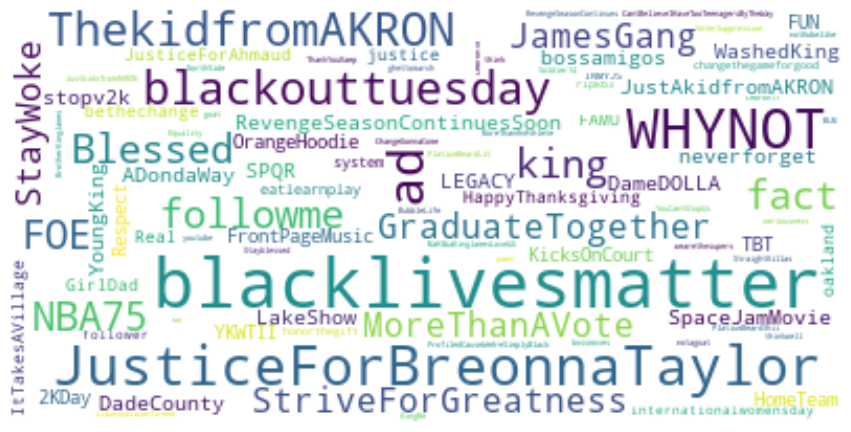

In [ ]:
from wordcloud import WordCloud
text = " ".join(cat for cat in hashtag_list)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.figure(figsize=(15,15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word Cloud -  All Hashtags Cloud
* Here all hashatags of the players are put into a huge list
* Then the word-cloud is made


In [ ]:
len(hashtag_list)

796

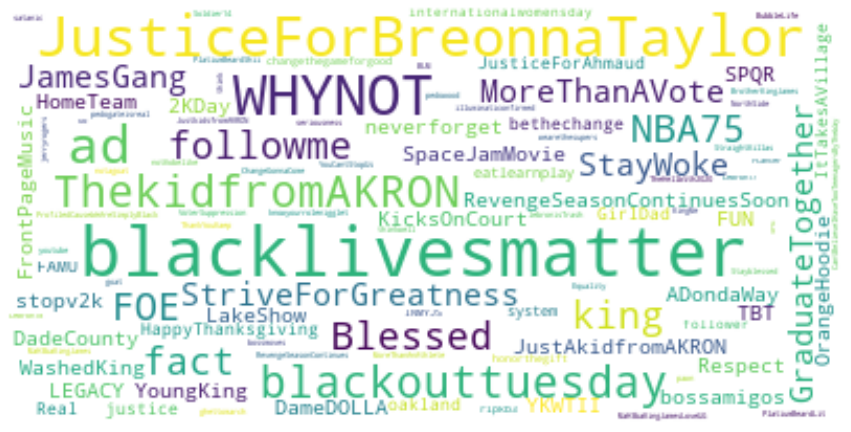

In [ ]:
from wordcloud import WordCloud
text = " ".join(cat for cat in hashtag_list)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.figure(figsize=(15,15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()